# 데이터분석방법론 1 : 과제물 2차 (제출기간 6.7~6.12)


### 학번 : 201685-010100
### 이름 : 지용기 

---

## 9주

### 1. In the graft.vs.host data set, estimate the survival function for patients with or without GVHD. Test the hypothesis that the survival is the same in both groups. Extend the analysis by including the other explanatory variables.

In [ ]:
# 설치는 한번만
#install.packages('survival', repos="http://cran.nexr.com/" )

In [1]:
library(survival)
library( ISwR )


Attaching package: 'ISwR'

The following object is masked from 'package:survival':

    lung



In [2]:
attach(graft.vs.host)

In [3]:
summary(  graft.vs.host  )
head(  graft.vs.host  )

      pnr         rcpage          donage           type            preg       
 Min.   : 1   Min.   :13.00   Min.   :14.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:10   1st Qu.:20.00   1st Qu.:20.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :19   Median :23.00   Median :23.00   Median :2.000   Median :0.0000  
 Mean   :19   Mean   :25.43   Mean   :25.81   Mean   :1.973   Mean   :0.2703  
 3rd Qu.:28   3rd Qu.:29.00   3rd Qu.:34.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :37   Max.   :43.00   Max.   :43.00   Max.   :3.000   Max.   :1.0000  
     index             gvhd             time             dead       
 Min.   : 0.270   Min.   :0.0000   Min.   :  41.0   Min.   :0.0000  
 1st Qu.: 0.920   1st Qu.:0.0000   1st Qu.: 177.0   1st Qu.:0.0000  
 Median : 2.010   Median :0.0000   Median : 667.0   Median :0.0000  
 Mean   : 2.556   Mean   :0.4595   Mean   : 669.8   Mean   :0.4865  
 3rd Qu.: 3.730   3rd Qu.:1.0000   3rd Qu.:1105.0   3rd Qu.:1.0000  
 Max.   :10.110   Max.   :1.0000 

,pnr,rcpage,donage,type,preg,index,gvhd,time,dead
1,1,27,23,2,0,0.27,0,95,1
2,2,13,18,2,0,0.31,0,1385,0
3,3,19,19,1,0,0.39,0,465,1
4,4,21,22,2,0,0.48,0,810,1
5,5,28,38,2,0,0.49,0,1497,0
6,6,22,20,2,0,0.5,0,1181,1


graft.vs.host Graft versus host disease
- 이 데이터는 acute graft-versus-host disease에 대한 연관있는 변수를 찾을 목적으로 골수 이식을 받은 환자로부터 데이터를 수집함.

- pnr a numeric vector patient number.
- rcpage a numeric vector, age of recipient (years).
- donage a numeric vector, age of donor (years).
- type a numeric vector, type of leukaemia coded 1: AML, 2: ALL, 3: CML for acute myeloid, acute lymphatic, and chronic myeloid leukaemia.
- preg a numeric vector code indicating whether donor has been pregnant. 0: no, 1: yes.
- index a numeric vector giving an index of mixed epidermal celllymphocyte reactions.
- gvhd a numeric vector code, graft-versus-host disease, 0: no, 1: yes.
- time a numeric vector, follow-up time
- dead a numeric vector code, 0: no (censored), 1: yes

In [4]:
gvhd <- factor(gvhd , levels=c(0, 1), labels=c("no", "yes") )
type <- factor(type,  levels=c(1, 2, 3),  labels=c("AML", "ALL", "CML")) 

생존함수를 계산하기 위한 survival object을 생성함.

In [5]:
disease.surv <- Surv( time, dead == 1 )
disease.surv

 [1]   95  1385+  465   810  1497+ 1181   993+  138   266   579+  600+ 1182+
[13]  841+ 1364+  695+ 1378+  736+ 1504+  849  1266+  186    41   667+  112 
[25]  572+   45  1019+  479   190   100   177    80   142  1105+  803+ 1126+
[37]  114 

gvhd구분하지 않는 경우와 gvhd을 구분한 생존함수를 구함.

In [6]:
disease.survft.all <- survfit( disease.surv ~ 1 )
summary( disease.survft.all )

Call: survfit(formula = disease.surv ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   41     37       1    0.973  0.0267        0.922        1.000
   45     36       1    0.946  0.0372        0.876        1.000
   80     35       1    0.919  0.0449        0.835        1.000
   95     34       1    0.892  0.0510        0.797        0.998
  100     33       1    0.865  0.0562        0.761        0.982
  112     32       1    0.838  0.0606        0.727        0.965
  114     31       1    0.811  0.0644        0.694        0.947
  138     30       1    0.784  0.0677        0.662        0.928
  142     29       1    0.757  0.0705        0.630        0.908
  177     28       1    0.730  0.0730        0.600        0.888
  186     27       1    0.703  0.0751        0.570        0.867
  190     26       1    0.676  0.0770        0.540        0.845
  266     25       1    0.649  0.0785        0.512        0.822
  465     24       1    0.622  0.0797        0.483        0.7

In [7]:
disease.survft.gvhd <- survfit( disease.surv ~ gvhd   )
summary(disease.survft.gvhd)

Call: survfit(formula = disease.surv ~ gvhd)

                gvhd=no 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   95     20       1    0.950  0.0487        0.859        1.000
  138     19       1    0.900  0.0671        0.778        1.000
  266     18       1    0.850  0.0798        0.707        1.000
  465     17       1    0.800  0.0894        0.643        0.996
  810     12       1    0.733  0.1039        0.556        0.968
  849     10       1    0.660  0.1166        0.467        0.933
 1181      8       1    0.577  0.1279        0.374        0.891

                gvhd=yes 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   41     17       1    0.941  0.0571        0.836        1.000
   45     16       1    0.882  0.0781        0.742        1.000
   80     15       1    0.824  0.0925        0.661        1.000
  100     14       1    0.765  0.1029        0.587        0.995
  112     13       1    0.706  0.1105        0.519        0.959
  114 

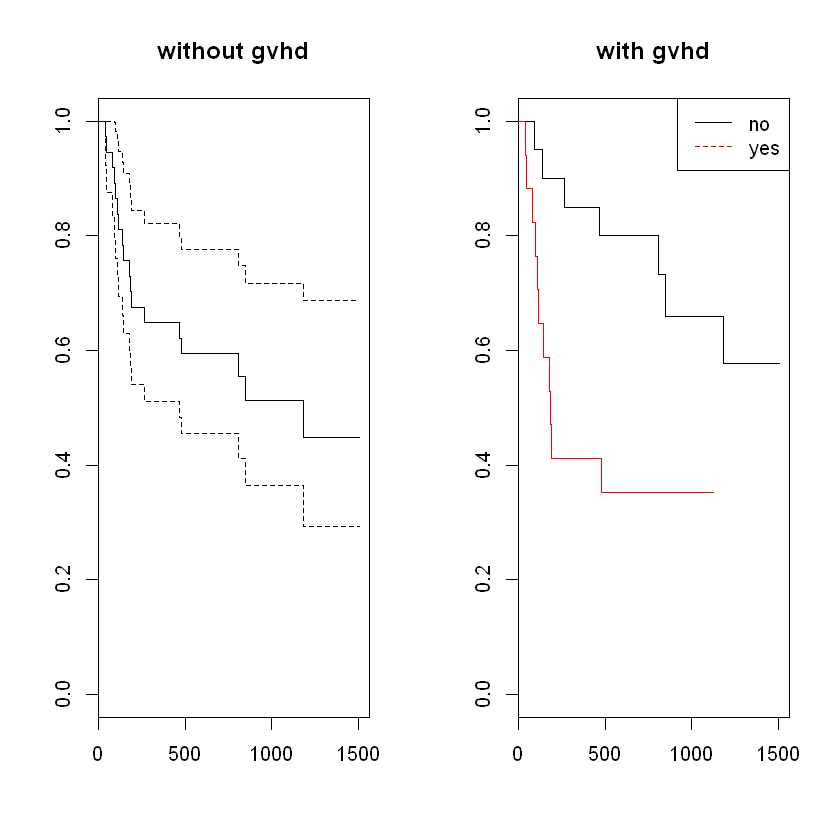

In [8]:
par(mfrow=c(1,2))
plot(disease.survft.all, main="without gvhd")
plot(disease.survft.gvhd, main="with gvhd", col=1:2 )
legend( "topright", legend=levels(gvhd), col=1:2, lty=1:2 )
par(mfrow=c(1,1))

ggsurv함수에 대한 설명
- http://www.r-statistics.com/2013/07/creating-good-looking-survival-curves-the-ggsurv-function/

In [10]:
source("ggsurv.R")

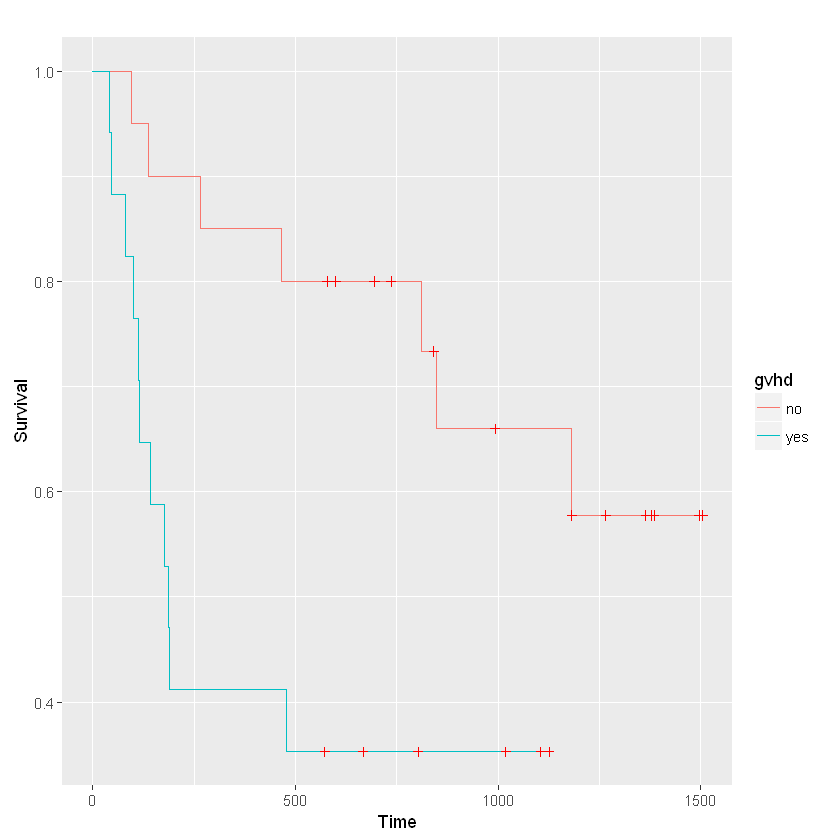

In [11]:
ggsurv(disease.survft.gvhd)

In [9]:
survdiff( Surv( time, dead == 1 ) ~ gvhd )

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd)

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7    11.99      2.07      6.55
gvhd=yes 17       11     6.01      4.14      6.55

 Chisq= 6.6  on 1 degrees of freedom, p= 0.0105 

- p-value가 0.05보다 작은 0.001이므로 gvhd 그룹간에는 차이가 있다고 판단할수 있음.

rcpage, donage, type, preg, index 변수들을 각각 추가해서 p-value이 0.05 작은 변수만 추출하고 이들 변수의 조합으로 최종 모델을 생성함.

In [17]:
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(rcpage) )
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(donage) )
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(type) )
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(preg) )
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(index) )

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(rcpage))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7     9.33     0.583      3.38
gvhd=yes 17       11     8.67     0.628      3.38

 Chisq= 3.4  on 1 degrees of freedom, p= 0.066 

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(donage))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7     7.93    0.1098     0.665
gvhd=yes 17       11    10.07    0.0865     0.665

 Chisq= 0.7  on 1 degrees of freedom, p= 0.415 

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(type))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7       14       3.5      23.9
gvhd=yes 17       11        4      12.2      23.9

 Chisq= 23.9  on 1 degrees of freedom, p= 1.04e-06 

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(preg))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7    10.62      1.23      4.03
gvhd=yes 17       11     7.38      1.78      4.03

 Chisq= 4  on 1 degrees of freedom, p= 0.0448 

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(index))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7      7.5    0.0333         1
gvhd=yes 17       11     10.5    0.0238         1

 Chisq= 1  on 1 degrees of freedom, p= 0.317 

- type, preg 이 두변수만 유의한것으로 나와서 두변수를 같이 생존분석을 실시함.

In [18]:
survdiff( Surv( time, dead == 1 ) ~ gvhd + strata(type) + strata(preg) )

Call:
survdiff(formula = Surv(time, dead == 1) ~ gvhd + strata(type) + 
    strata(preg))

          N Observed Expected (O-E)^2/E (O-E)^2/V
gvhd=no  20        7    10.45      1.14      9.27
gvhd=yes 17       11     7.55      1.58      9.27

 Chisq= 9.3  on 1 degrees of freedom, p= 0.00232 

###  2. Fit Cox models to the stroke data with age and sex as predictors and with sex alone. Explain the difference.

In [26]:
attach( stroke )

The following objects are masked from stroke (pos = 3):

    age, coma, dead, dgn, diab, died, dstr, han, minf, obsmonths, sex

The following object is masked from melanom:

    sex

The following object is masked from graft.vs.host:

    dead



In [22]:
summary(stroke )

     sex           died                 dstr                 age       
 Female:510   Min.   :1991-01-07   Min.   :1991-01-02   Min.   : 1.00  
 Male  :319   1st Qu.:1992-03-10   1st Qu.:1991-11-08   1st Qu.:61.00  
              Median :1993-01-18   Median :1992-08-12   Median :71.00  
              Mean   :1993-02-02   Mean   :1992-07-27   Mean   :69.89  
              3rd Qu.:1993-10-19   3rd Qu.:1993-04-30   3rd Qu.:81.00  
              Max.   :1995-11-11   Max.   :1993-12-31   Max.   :96.00  
  dgn        coma       diab       minf       han         dead        
 ICH: 79   No  :745   No  :722   No  :725   No  :410   Mode :logical  
 ID :202   Yes : 80   Yes : 97   Yes : 97   Yes :411   FALSE:344      
 INF:501   NA's:  4   NA's: 10   NA's:  7   NA's:  8   TRUE :485      
 SAH: 47                                               NA's :0        
                                                                      
                                                                      

stroke 데이터셋은 1991~1993년 사이에 Estonia Tartu에서 뇌졸증 발병에 대한 데이터이고, 1996년 1월까지 데이터를 수집됨.
- sex a factor with levels Female and Male.
- died a Date, date of death.
- dstr a Date, date of stroke.
- age a numeric vector, age at stroke.
- dgn a factor, diagnosis, with levels ICH (intracranial haemorrhage), ID (unidentified). INF (infarction, ischaemic), SAH (subarchnoid haemorrhage).
- coma a factor with levels No and Yes, indicating whether patient was in coma after the stroke.
- diab a factor with levels No and Yes, history of diabetes.
- minf a factor with levels No and Yes, history of myocardial infarction. 
- han a factor with levels No and Yes, history of hypertension.
- obsmonths a numeric vector, observation times in months (set to 0.1 for patients dying on the same day as the stroke).
- dead a logical vector, whether patient died during the study.

생존 시간이 없고, 발생날짜와 사망날짜만이기 때문에 이것을 이용해서 생존시간을 구할 수 있음.

In [24]:
stroke <- transform(stroke, end = pmin(died, as.Date("1996-1-1"), na.rm = T), dead = !is.na(died) & died < as.Date("1996-1-1"))
stroke <- transform(stroke, obstime = as.numeric(end - dstr, units="days")/365.25)
 head(stroke)

,sex,died,dstr,age,dgn,coma,diab,minf,han,dead,obsmonths,end,obstime
1,Male,1991-01-07,1991-01-02,76,INF,No,No,Yes,No,TRUE,0.1633987,1991-01-07,0.01368925
2,Male,NA,1991-01-03,58,INF,No,No,No,No,FALSE,59.60784,1996-01-01,4.99384
3,Male,1991-06-02,1991-01-08,74,INF,No,No,Yes,Yes,TRUE,4.738562,1991-06-02,0.3969884
4,Female,1991-01-13,1991-01-11,77,ICH,No,Yes,No,Yes,TRUE,0.06535948,1991-01-13,0.005475702
5,Female,NA,1991-01-13,76,INF,No,Yes,No,Yes,FALSE,59.28105,1996-01-01,4.966461
6,Male,1991-01-13,1991-01-13,48,ICH,Yes,No,No,Yes,TRUE,0.1,1991-01-13,0


In [30]:
summary ( coxph( Surv(obstime, dead)~sex ) )

Call:
coxph(formula = Surv(obstime, dead) ~ sex)

  n= 829, number of events= 485 

            coef exp(coef) se(coef)      z Pr(>|z|)    
sexMale -0.36325   0.69541  0.09616 -3.777 0.000158 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

        exp(coef) exp(-coef) lower .95 upper .95
sexMale    0.6954      1.438     0.576    0.8396

Concordance= 0.546  (se = 0.012 )
Rsquare= 0.018   (max possible= 0.999 )
Likelihood ratio test= 14.77  on 1 df,   p=0.0001217
Wald test            = 14.27  on 1 df,   p=0.0001584
Score (logrank) test = 14.42  on 1 df,   p=0.0001459


In [31]:
summary (coxph( Surv(obstime, dead)~sex  + age ) )

Call:
coxph(formula = Surv(obstime, dead) ~ sex + age)

  n= 829, number of events= 485 

            coef exp(coef) se(coef)      z Pr(>|z|)    
sexMale 0.023829  1.024115 0.100752  0.237    0.813    
age     0.049072  1.050296 0.004374 11.218   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

        exp(coef) exp(-coef) lower .95 upper .95
sexMale     1.024     0.9765    0.8406     1.248
age         1.050     0.9521    1.0413     1.059

Concordance= 0.658  (se = 0.014 )
Rsquare= 0.173   (max possible= 0.999 )
Likelihood ratio test= 157.2  on 2 df,   p=0
Wald test            = 136.5  on 2 df,   p=0
Score (logrank) test = 135  on 2 df,   p=0


- sex변수만을 넣고 coxph 모형을 적합했을때는 성별에 따라서 생존시간에 영향을 준다고 나오지만,  sex, age변수를 넣고 coxph 모형을 적합하면 성별은 유의하자 않고, age만 유의하다고 나옴.
- 그 원인은 아래 boxplot()으로 보여지는 것 같이 성별에 따라서 나이의 분포가 다르기 때문임.
- 남자가 여자보다 어리기 때문에 생존률이 좋음.

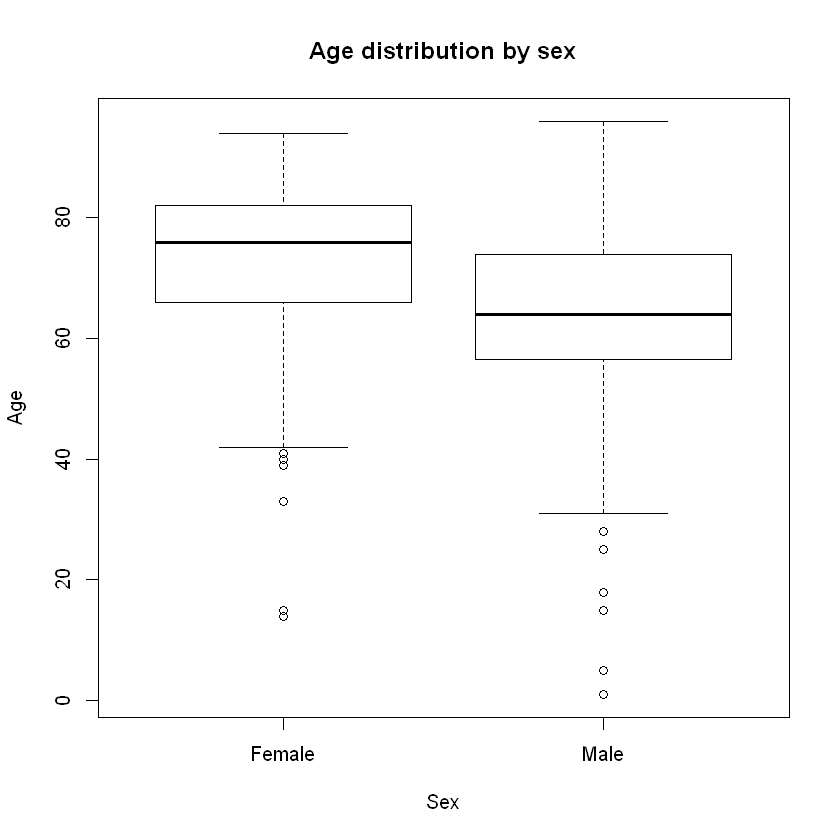

In [41]:
boxplot( age ~ sex, data=stroke, main="Age distribution by sex", xlab="Sex", ylab="Age" )

## 10주 - Data sets - from faraway R package

### 1. The dataset teengamb concerns a study of teenage gambling in Britain.  Make a numerical and graphical summary of the data, commenting on any features that you find interesting.   Limit the output you present to a quantity that a busy reader would find sufficient to get a basic understanding of the data.

In [43]:
#install.packages('faraway', repos="http://cran.nexr.com/" )

package 'faraway' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\RtmpieT3ar\downloaded_packages


In [26]:
library(faraway)

In [ ]:
data(teengamb)
attach(teengamb)

In [55]:
summary(teengamb)
head(teengamb)

      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

,sex,status,income,verbal,gamble
1,1,51,2,8,0
2,1,28,2.5,8,0
3,1,37,2,6,0
4,1,28,7,4,7.3
5,1,65,2,8,19.6
6,1,61,3.47,6,0.1


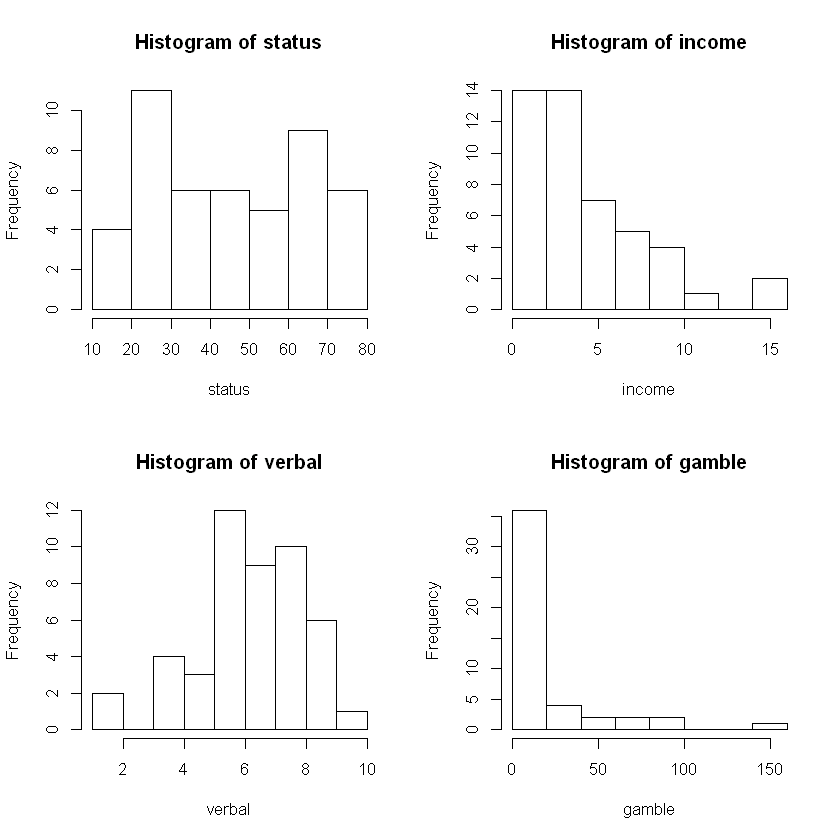

In [62]:
par(mfrow=c(2,2))
hist( status )
hist( income )
hist( verbal )
hist( gamble )
par(mfrow=c(1,1))

- income과 gamble변수가 한쪽으로 치우져 있으므로 log 변환이 필요함

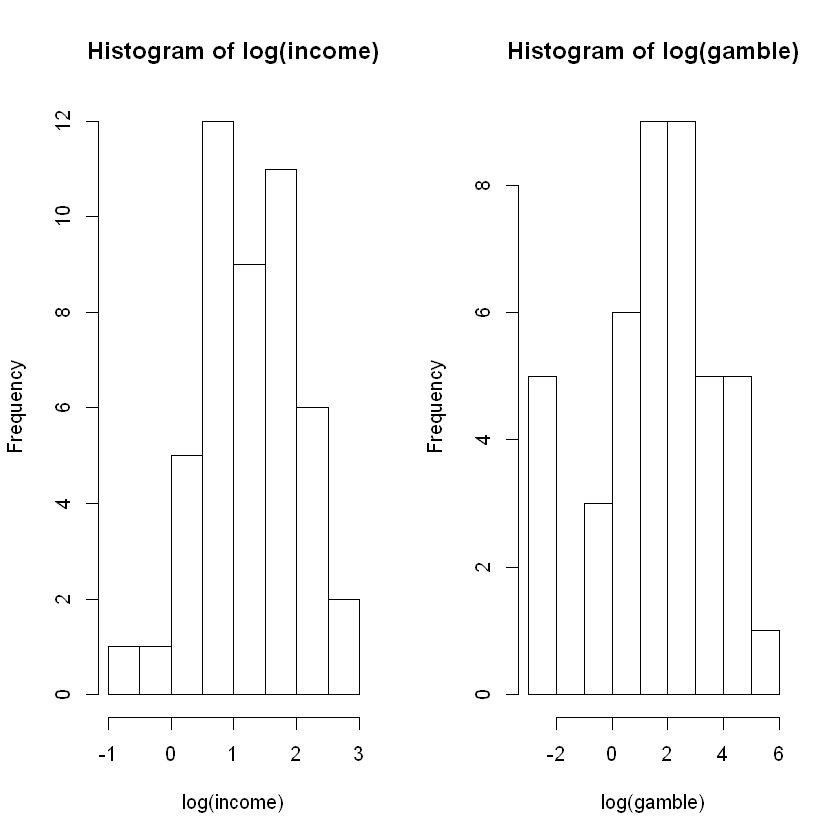

In [64]:
par(mfrow=c(1,2))
hist( log(income) )
hist( log(gamble) )
par(mfrow=c(1,1))

### 2. The dataset teengamb concerns a study of teenage gambling in Britain. Fit a regression model with the expenditure on gambling as the response and the sex, status, income and verbal score as predictors. Present the output.

In [67]:
summary ( lm(gamble ~ sex ) )
summary ( lm(gamble ~ status ) )
summary ( lm(gamble ~ income ) )
summary ( lm(gamble ~ verbal ) )


Call:
lm(formula = gamble ~ sex)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.775 -18.325  -3.766   6.334 126.225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   29.775      5.498   5.415 2.28e-06 ***
sex          -25.909      8.648  -2.996  0.00444 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29.09 on 45 degrees of freedom
Multiple R-squared:  0.1663,	Adjusted R-squared:  0.1478 
F-statistic: 8.977 on 1 and 45 DF,  p-value: 0.004437



Call:
lm(formula = gamble ~ status)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.708 -17.903 -13.929   2.195 135.020 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 23.46486   13.14189   1.786   0.0809 .
status      -0.09205    0.27180  -0.339   0.7364  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.82 on 45 degrees of freedom
Multiple R-squared:  0.002542,	Adjusted R-squared:  -0.01962 
F-statistic: 0.1147 on 1 and 45 DF,  p-value: 0.7364



Call:
lm(formula = gamble ~ income)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.020 -11.874  -3.757  11.934 107.120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -6.325      6.030  -1.049      0.3    
income         5.520      1.036   5.330 3.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.95 on 45 degrees of freedom
Multiple R-squared:  0.387,	Adjusted R-squared:  0.3734 
F-statistic: 28.41 on 1 and 45 DF,  p-value: 3.045e-06



Call:
lm(formula = gamble ~ verbal)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.036 -18.047 -13.294   4.271 126.764 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   44.178     17.053   2.591   0.0129 *
verbal        -3.736      2.469  -1.513   0.1372  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.08 on 45 degrees of freedom
Multiple R-squared:  0.04842,	Adjusted R-squared:  0.02728 
F-statistic:  2.29 on 1 and 45 DF,  p-value: 0.1372


#### (a) What percentage of variation in the response is explained by these predictors?

- sex는 0.1663
- status는 0.002542
- income는 0.387
- verbal는  0.04842

#### (b) Which observation has the largest (positive) residual? Give the case number.

- status가 잔차가 31.82 으로 가장 큼.

#### (c) Compute the mean and median of the residuals.

In [76]:
res.status <- residuals( lm(gamble ~ status ) )
mean( res.status ) ; median( res.status )

[1] 2.720932e-16

[1] -13.92931

### (d) Compute the correlation of the residuals with the fitted values.

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] 4.193672e-16

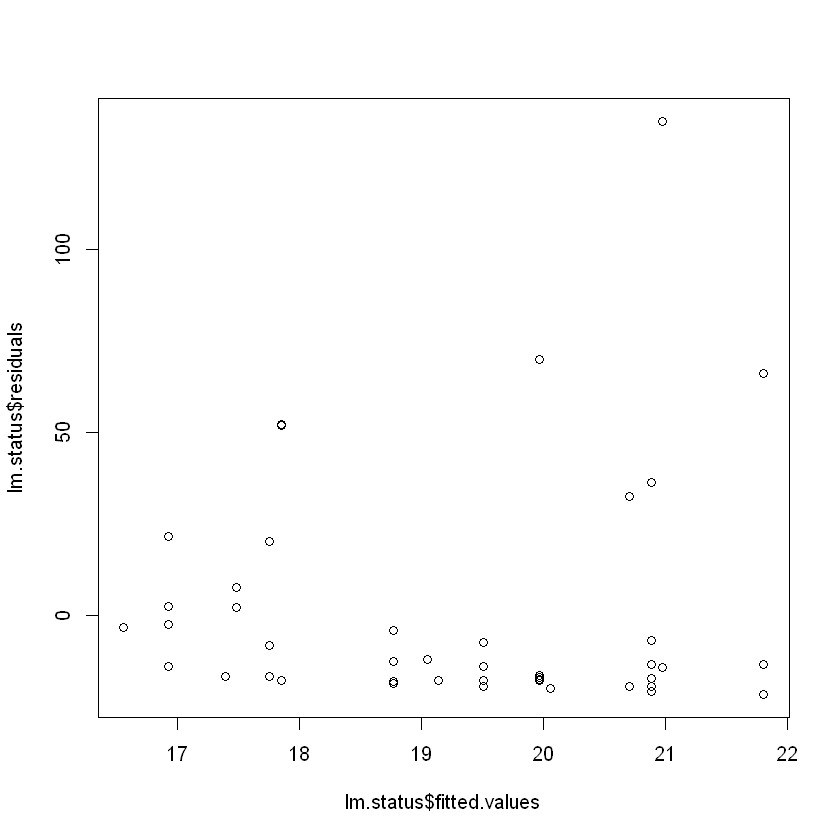

In [78]:
lm.status <- lm(gamble ~ status )
names(  lm.status )

cor( lm.status$fitted.values, lm.status$residuals )
plot( lm.status$fitted.values, lm.status$residuals )

#### (e) Compute the correlation of the residuals with the income.

[1] -1.372864e-17

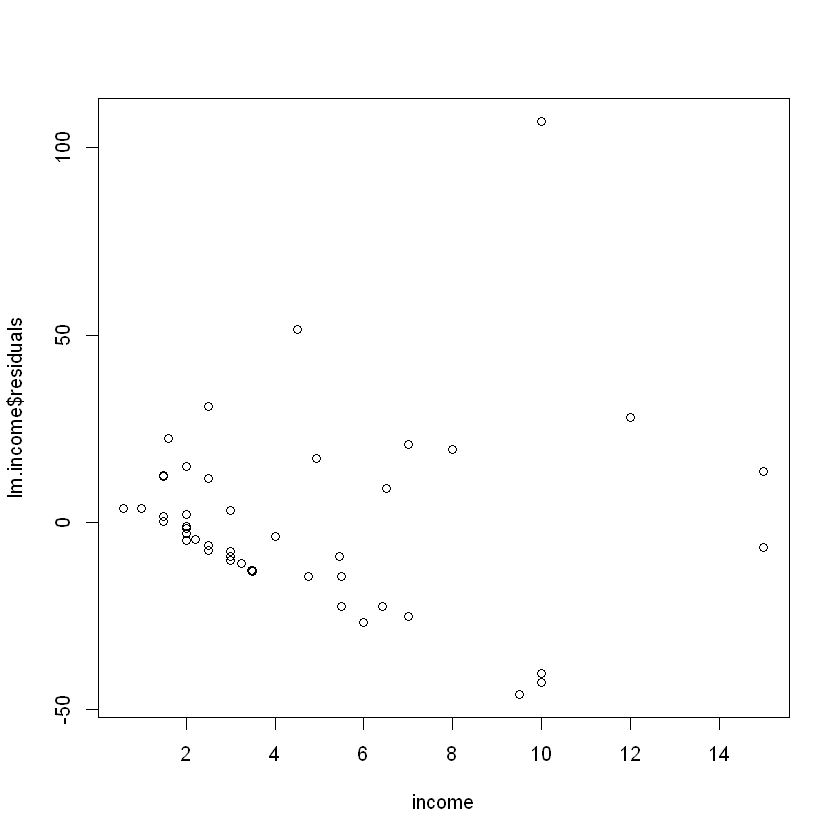

In [81]:
lm.income <- lm(gamble ~ income)

cor( income, lm.income$residuals )
plot( income, lm.income$residuals )

#### (f) For all other predictors held constant, what would be the difference in predicted expenditure on gambling for a male compared to a female?

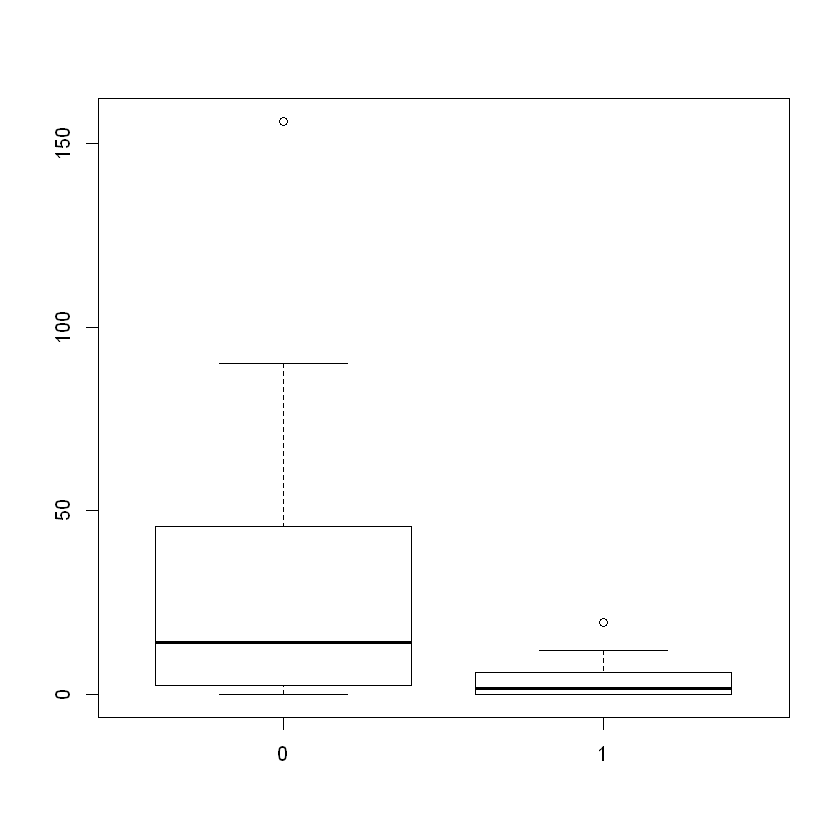

In [82]:
boxplot( gamble ~  sex )

- 성별 0 이 도박으로 지출하는 금액이 평균적으로 크고 넓게 분포하며 이상치도 아주 크게 나타남.

### 3. In this question, we investigate the relative merits of methods for computing the coefficients. Generate some artificial data by:
```
> x < - 1:20
> y < - x+rnorm(20)
```
### Fit a polynomial in x for predicting y. Compute in two ways—by lm ( ) and by using the direct calculation described in the chapter. At what degree of polynomial does the direct calculation method fail? (Note the need for the I ( ) function in fitting the polynomial, that is, lm(y˜x+I(x^2)) .

In [8]:
x <- 1:20
y <- x + rnorm(20)
lm( y ~ x + I(x^2) )


Call:
lm(formula = y ~ x + I(x^2))

Coefficients:
(Intercept)            x       I(x^2)  
  -0.320480     1.113076    -0.005148  


In [22]:
X <- cbind( 1, x, x^2 )
colnames( X ) <- c( "Intercept", "x", "x^2")

In [23]:
xtxi <- solve(t(X) %*% X)
betaHat <- xtxi %*% t(X) %*% y
betaHat

Intercept,-0.3204797
x,1.113076
x^2,-0.005148347


### 4. For the prostate data, fit a model with lpsa as the response and the other variables as predictors.

In [35]:
data(prostate)
summary( prostate )

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

#### (a) Compute 90 and 95% CIs for the parameter associated with age. Using just these intervals, what could we have deduced about the p-value for age in the regression summary?

In [36]:
prostate.lm.age  <- lm( lpsa ~ age , data=prostate  )
summary( prostate.lm.age  )


Call:
lm(formula = lpsa ~ age, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.90738 -0.71234  0.06967  0.66188  2.99584 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.79906    1.00793   0.793   0.4299  
age          0.02629    0.01568   1.677   0.0968 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.144 on 95 degrees of freedom
Multiple R-squared:  0.02876,	Adjusted R-squared:  0.01854 
F-statistic: 2.813 on 1 and 95 DF,  p-value: 0.09677


In [52]:
pred.frame <- data.frame( age = 40 )
predict( prostate.lm.age, level = c(0.9, 0.95), int="confidence", newdata=pred.frame )
predict( prostate.lm.age, level = c(0.9, 0.95), int="prediction", newdata=pred.frame )

fit,lwr,upr
1.850842,1.200130,2.501554
1.850842,1.073126,2.628558


fit,lwr,upr
1.8508419,-0.1570659,3.8587498
1.8508419,-0.5489634,4.2506473


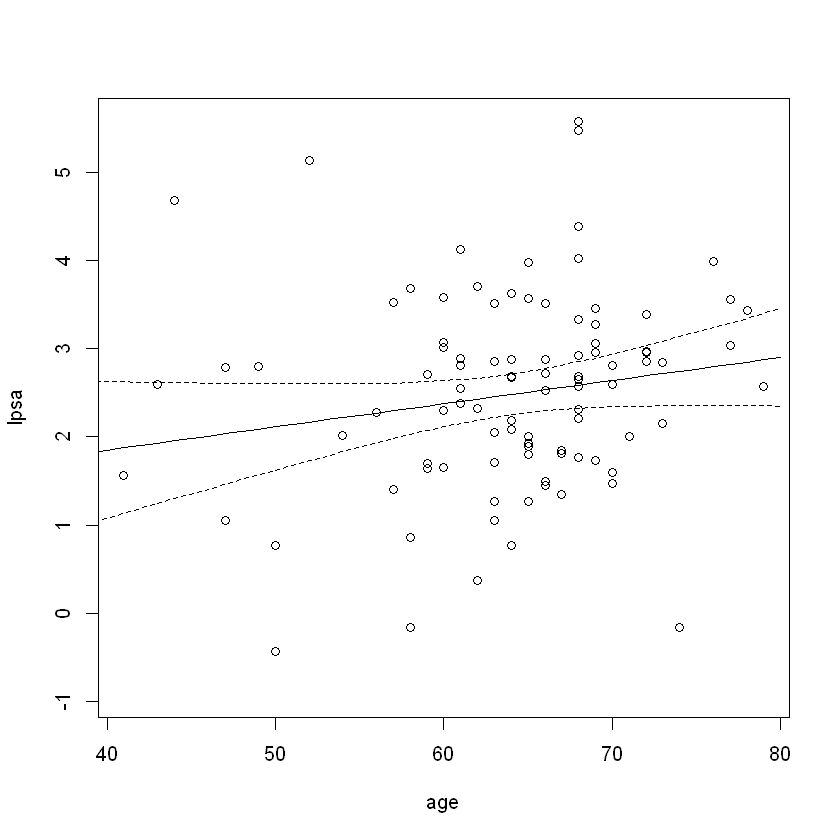

In [53]:
pred.frame <- data.frame( age = 30 : 80 )
pc <- predict( prostate.lm.age, int="c", newdata=pred.frame )

with( prostate,  plot( age , lpsa, ylim=range(lpsa, pp, na.rm=T  ) ) )
pred.age <- pred.frame$age
matlines( pred.age, pc , lty=c(1,2,2), col="black" )

## 11주

### 1. Using the teengamb data, model gamble as the response and the other variables as predictors. Take care to investigate the possibility of interactions between sex and the other predictors. Interpret your final model.

In [3]:
library(faraway)
data(teengamb)
attach(teengamb)

The following objects are masked from teengamb (pos = 3):

    gamble, income, sex, status, verbal



In [5]:
summary(teengamb)

      sex             status          income           verbal     
 Min.   :0.0000   Min.   :18.00   Min.   : 0.600   Min.   : 1.00  
 1st Qu.:0.0000   1st Qu.:28.00   1st Qu.: 2.000   1st Qu.: 6.00  
 Median :0.0000   Median :43.00   Median : 3.250   Median : 7.00  
 Mean   :0.4043   Mean   :45.23   Mean   : 4.642   Mean   : 6.66  
 3rd Qu.:1.0000   3rd Qu.:61.50   3rd Qu.: 6.210   3rd Qu.: 8.00  
 Max.   :1.0000   Max.   :75.00   Max.   :15.000   Max.   :10.00  
     gamble     
 Min.   :  0.0  
 1st Qu.:  1.1  
 Median :  6.0  
 Mean   : 19.3  
 3rd Qu.: 19.4  
 Max.   :156.0  

In [8]:
teengamb.lm <- lm( gamble ~ sex + status + income + verbal , data=teengamb )
summary( teengamb.lm )


Call:
lm(formula = gamble ~ sex + status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


In [10]:
teengamb.lm <- lm( gamble ~ sex + income + verbal , data=teengamb )
summary( teengamb.lm )


Call:
lm(formula = gamble ~ sex + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.639 -11.765  -1.594   9.305  93.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1390    14.7686   1.634   0.1095    
sex         -22.9602     6.7706  -3.391   0.0015 ** 
income        4.8981     0.9551   5.128 6.64e-06 ***
verbal       -2.7468     1.8253  -1.505   0.1397    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.43 on 43 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.4933 
F-statistic: 15.93 on 3 and 43 DF,  p-value: 4.148e-07


In [12]:
teengamb.lm <- lm( gamble ~ sex + income + sex:income , data=teengamb )
summary( teengamb.lm )


Call:
lm(formula = gamble ~ sex + income + sex:income, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.522  -4.860  -1.790   6.273  93.478 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.6596     6.3164  -0.421  0.67580    
sex           5.7996    11.2003   0.518  0.60724    
income        6.5181     0.9881   6.597 4.95e-08 ***
sex:income   -6.3432     2.1446  -2.958  0.00502 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.98 on 43 degrees of freedom
Multiple R-squared:  0.5857,	Adjusted R-squared:  0.5568 
F-statistic: 20.26 on 3 and 43 DF,  p-value: 2.451e-08


In [16]:
teengamb.lm <- lm( gamble ~ income + sex:income , data=teengamb )
summary( teengamb.lm )


Call:
lm(formula = gamble ~ income + sex:income, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.120  -5.699  -0.925   4.878  93.880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8151     5.1726  -0.158    0.876    
income        6.2935     0.8804   7.149 6.92e-09 ***
income:sex   -5.4236     1.1921  -4.550 4.20e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.81 on 44 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.5642 
F-statistic: 30.77 on 2 and 44 DF,  p-value: 4.372e-09


해석 
- income 1단위 증가할때, gamble은  6.2935만큼 증가하고,  성별 1일때 income이 1단위 증가할때 gamble은 -5.4236만큼 감소
- 즉, 남자인 경우는 income 1단위 증가할때, gamble은  6.2935만큼 증가하고, 여자인 경우는 income 1단위 증가할때, gamble은  (6.29350-5.4236) 만큼 증가함.

### 2. Plot the ToothGrowth data with len as the response. Fit a linear model to the data and check for possible simplification. Display the fitted regression lines on top of the data.

In [22]:
require(graphics)

In [23]:
summary( ToothGrowth )

      len        supp         dose      
 Min.   : 4.20   OJ:30   Min.   :0.500  
 1st Qu.:13.07   VC:30   1st Qu.:0.500  
 Median :19.25           Median :1.000  
 Mean   :18.81           Mean   :1.167  
 3rd Qu.:25.27           3rd Qu.:2.000  
 Max.   :33.90           Max.   :2.000  

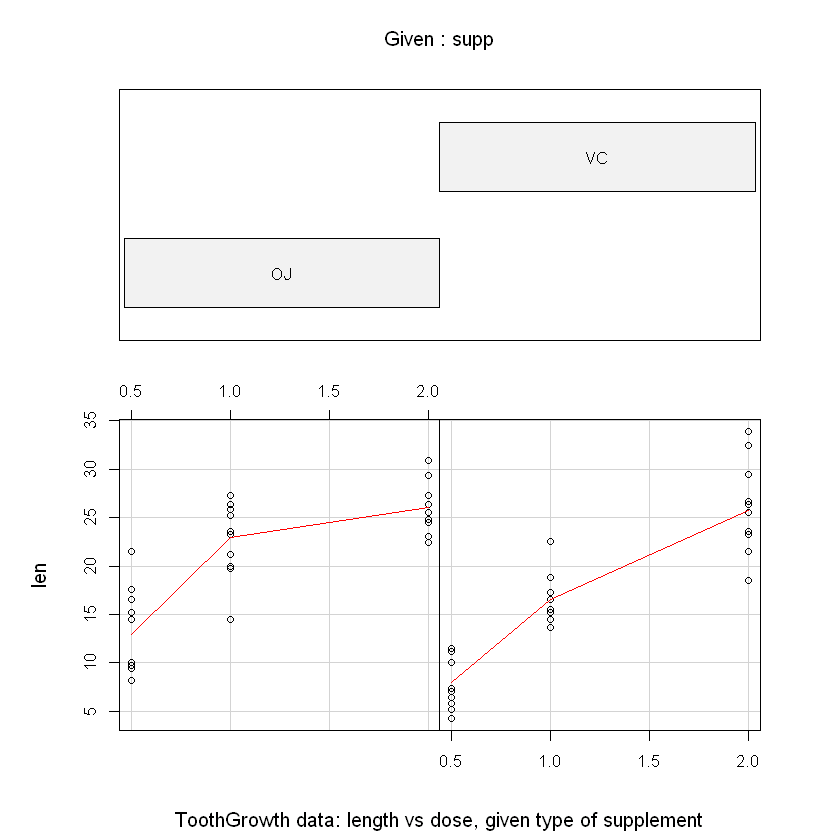

In [24]:
coplot(len ~ dose | supp, data = ToothGrowth, panel = panel.smooth,
       xlab = "ToothGrowth data: length vs dose, given type of supplement")

### 3. Find a good model for the uswages data with wages as the response and all the other variables as predictors.

In [25]:
data(uswages)

In [27]:
summary( uswages )

      wage              educ           exper            race      
 Min.   :  50.39   Min.   : 0.00   Min.   :-2.00   Min.   :0.000  
 1st Qu.: 308.64   1st Qu.:12.00   1st Qu.: 8.00   1st Qu.:0.000  
 Median : 522.32   Median :12.00   Median :15.00   Median :0.000  
 Mean   : 608.12   Mean   :13.11   Mean   :18.41   Mean   :0.078  
 3rd Qu.: 783.48   3rd Qu.:16.00   3rd Qu.:27.00   3rd Qu.:0.000  
 Max.   :7716.05   Max.   :18.00   Max.   :59.00   Max.   :1.000  
      smsa             ne              mw               so        
 Min.   :0.000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.000   Median :0.000   Median :0.0000   Median :0.0000  
 Mean   :0.756   Mean   :0.229   Mean   :0.2485   Mean   :0.3125  
 3rd Qu.:1.000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
       we             pt        
 Min.   :0.00   Min.   :0.000

In [32]:
head( uswages )

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
6085,771.6,18,18,0,1,1,0,0,0,0
23701,617.28,15,20,0,1,0,0,0,1,0
16208,957.83,16,9,0,1,0,0,1,0,0
2720,617.28,12,24,0,1,1,0,0,0,0
9723,902.18,14,12,0,1,0,1,0,0,0
22239,299.15,12,33,0,1,0,0,0,1,0


race, smsa, ne, mw, so, we, pt 변수는 0, 1 로 범주형 변수로 파악되고, 0, 1이기 때문에 범주형으로 변수 변환을 하지 않음.

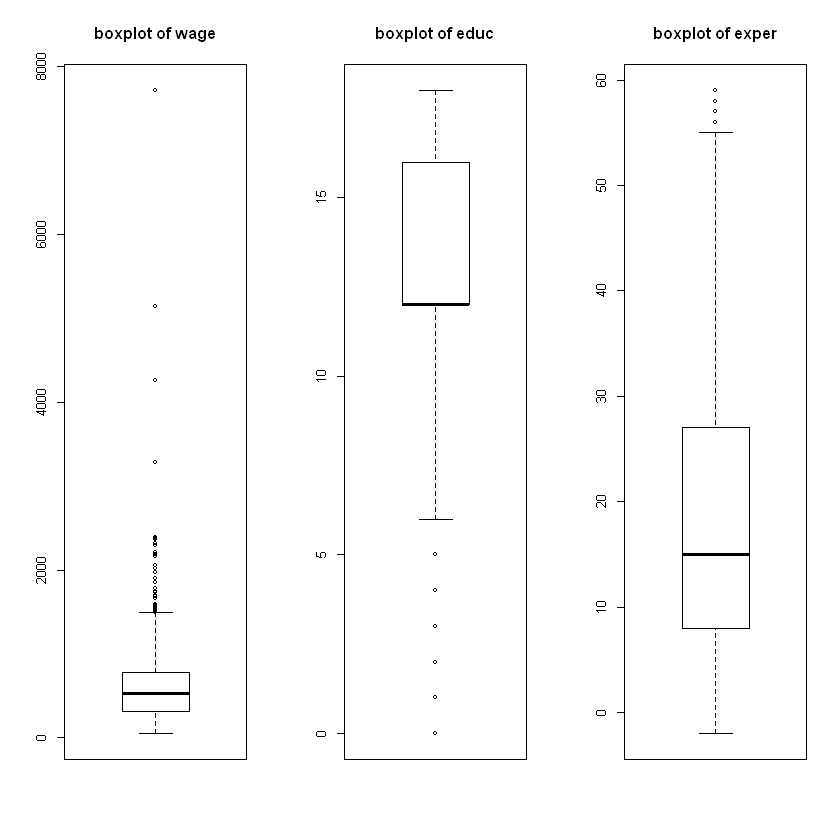

In [76]:
par(mfrow=c(1,3))
boxplot( uswages$wage, main="boxplot of wage" )
boxplot( uswages$educ, main="boxplot of educ" )
boxplot( uswages$exper, main="boxplot of exper" )
par(mfrow=c(1,1))

- 반응변수인 wage가 정규분포가 아니기 때문에 변수 변환이 필요함, 

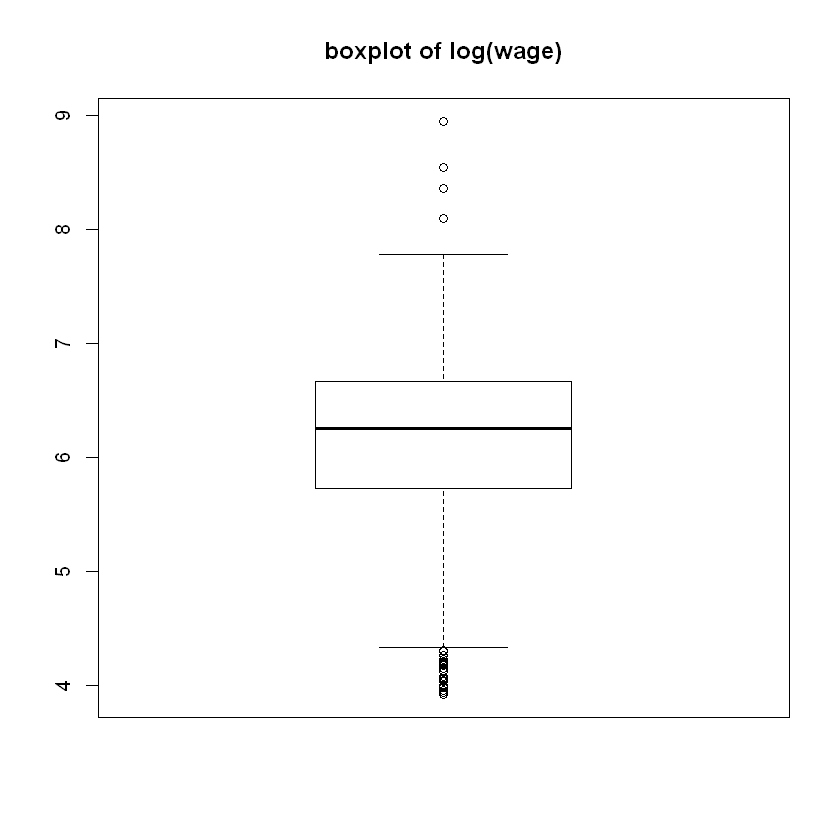

In [78]:
boxplot( log(uswages$wage), main="boxplot of log(wage)" )

- log 변환후에는 정규분포형태를 나타냄

In [79]:
uswages.lm <- lm( log(wage) ~ educ + exper + race + smsa + ne + mw + so + we + pt , na.action=na.omit, data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + race + smsa + ne + mw + 
    so + we + pt, data = uswages, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5137 -0.3417  0.0535  0.3570  3.9444 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.757283   0.074404  63.939  < 2e-16 ***
educ         0.086736   0.004509  19.237  < 2e-16 ***
exper        0.016101   0.001008  15.975  < 2e-16 ***
race        -0.208361   0.048840  -4.266 2.08e-05 ***
smsa         0.176445   0.030169   5.849 5.78e-09 ***
ne          -0.056539   0.038822  -1.456    0.145    
mw          -0.046490   0.037955  -1.225    0.221    
so          -0.038957   0.036597  -1.065    0.287    
we                 NA         NA      NA       NA    
pt          -1.098261   0.044324 -24.778  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5719 on 1991 degrees of freedom
Mu

- ne, mw, so는 유의하지 않은것으로 나오고, we는 NA로 나와서 we변수에 na가 있는지 확인이 필요함

In [56]:
sum(is.na( uswages$we ))

[1] 0

- 결측치가 있는지 확인했지만 없는것을 나옴. 필요없는 변수로 판단되어  we변수도 제거함. 

In [80]:
uswages.lm <- lm( log(wage) ~ educ + exper + race + smsa + mw + pt, data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + race + smsa + mw + pt, 
    data = uswages)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5351 -0.3351  0.0497  0.3584  3.9404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.729088   0.070956  66.648  < 2e-16 ***
educ         0.086616   0.004506  19.224  < 2e-16 ***
exper        0.016031   0.001007  15.923  < 2e-16 ***
race        -0.212422   0.048047  -4.421 1.03e-05 ***
smsa         0.173801   0.029970   5.799 7.73e-09 ***
mw          -0.013388   0.029718  -0.451    0.652    
pt          -1.097897   0.044325 -24.769  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5719 on 1993 degrees of freedom
Multiple R-squared:  0.3843,	Adjusted R-squared:  0.3825 
F-statistic: 207.4 on 6 and 1993 DF,  p-value: < 2.2e-16


- mw 변수가 유의하지 않는것으로 나옴. mw변수 제거

In [81]:
uswages.lm <- lm( log(wage) ~ educ + exper + race + smsa + pt, data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + race + smsa + pt, data = uswages)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5319 -0.3330  0.0495  0.3563  3.9435 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.725711   0.070545  66.989  < 2e-16 ***
educ         0.086566   0.004503  19.223  < 2e-16 ***
exper        0.016037   0.001006  15.934  < 2e-16 ***
race        -0.211327   0.047976  -4.405 1.11e-05 ***
smsa         0.174543   0.029919   5.834 6.30e-09 ***
pt          -1.098583   0.044290 -24.804  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5718 on 1994 degrees of freedom
Multiple R-squared:  0.3843,	Adjusted R-squared:  0.3827 
F-statistic: 248.9 on 5 and 1994 DF,  p-value: < 2.2e-16


In [85]:
uswages.lm <- lm( log(wage) ~ educ + exper + race + smsa + pt, data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + race + smsa + pt, data = uswages)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5319 -0.3330  0.0495  0.3563  3.9435 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.725711   0.070545  66.989  < 2e-16 ***
educ         0.086566   0.004503  19.223  < 2e-16 ***
exper        0.016037   0.001006  15.934  < 2e-16 ***
race        -0.211327   0.047976  -4.405 1.11e-05 ***
smsa         0.174543   0.029919   5.834 6.30e-09 ***
pt          -1.098583   0.044290 -24.804  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5718 on 1994 degrees of freedom
Multiple R-squared:  0.3843,	Adjusted R-squared:  0.3827 
F-statistic: 248.9 on 5 and 1994 DF,  p-value: < 2.2e-16


- 소득은 0부터 시작되므로 Intercept 을 제거함

In [87]:
uswages.lm <- lm( log(wage) ~ educ + exper + race + smsa + pt + 0 , data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + race + smsa + pt + 0, 
    data = uswages)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0607 -0.4589  0.1983  0.8194  6.9909 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
educ   0.355806   0.003661  97.185   <2e-16 ***
exper  0.050341   0.001562  32.234   <2e-16 ***
race   0.161330   0.085892   1.878   0.0605 .  
smsa   0.648574   0.052397  12.378   <2e-16 ***
pt    -0.866412   0.079587 -10.886   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.031 on 1995 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.9725 
F-statistic: 1.413e+04 on 5 and 1995 DF,  p-value: < 2.2e-16


- Intercept을 제거하면 race가 유의하지 않게 나오므로 race 제거

In [88]:
uswages.lm <- lm( log(wage) ~ educ + exper + smsa + pt + 0 , data=uswages)
summary( uswages.lm )


Call:
lm(formula = log(wage) ~ educ + exper + smsa + pt + 0, data = uswages)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9238 -0.4616  0.1981  0.8171  6.9795 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
educ   0.355922   0.003663   97.17   <2e-16 ***
exper  0.050550   0.001559   32.43   <2e-16 ***
smsa   0.656242   0.052271   12.55   <2e-16 ***
pt    -0.861028   0.079585  -10.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.031 on 1996 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.9724 
F-statistic: 1.764e+04 on 4 and 1996 DF,  p-value: < 2.2e-16


이 모형이 최종임.

## 12주

### 1. Using the sat dataset, fit a model with the total SAT score as the response and expend, salary, ratio and takers as predictors. Perform regression diagnostics on this model to answer the following questions. Display any plots that are relevent. Do not provide any plots about which you have nothing to say.

In [5]:
library(faraway)
data(sat)

In [30]:
summary(sat)
head( sat )

     expend          ratio           salary          takers     
 Min.   :3.656   Min.   :13.80   Min.   :25.99   Min.   : 4.00  
 1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98   1st Qu.: 9.00  
 Median :5.768   Median :16.60   Median :33.29   Median :28.00  
 Mean   :5.905   Mean   :16.86   Mean   :34.83   Mean   :35.24  
 3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55   3rd Qu.:63.00  
 Max.   :9.774   Max.   :24.30   Max.   :50.05   Max.   :81.00  
     verbal           math           total       
 Min.   :401.0   Min.   :443.0   Min.   : 844.0  
 1st Qu.:427.2   1st Qu.:474.8   1st Qu.: 897.2  
 Median :448.0   Median :497.5   Median : 945.5  
 Mean   :457.1   Mean   :508.8   Mean   : 965.9  
 3rd Qu.:490.2   3rd Qu.:539.5   3rd Qu.:1032.0  
 Max.   :516.0   Max.   :592.0   Max.   :1107.0  

,expend,ratio,salary,takers,verbal,math,total
Alabama,4.405,17.2,31.144,8,491,538,1029
Alaska,8.963,17.6,47.951,47,445,489,934
Arizona,4.778,19.3,32.175,27,448,496,944
Arkansas,4.459,17.1,28.934,6,482,523,1005
California,4.992,24,41.078,45,417,485,902
Colorado,5.443,18.4,34.571,29,462,518,980


In [10]:
sat.lm <- lm( total ~ expend + salary + ratio, data=sat )
summary( sat.lm )


Call:
lm(formula = total ~ expend + salary + ratio, data = sat)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.911  -46.740   -7.535   47.966  123.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1069.234    110.925   9.639 1.29e-12 ***
expend        16.469     22.050   0.747   0.4589    
salary        -8.823      4.697  -1.878   0.0667 .  
ratio          6.330      6.542   0.968   0.3383    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.65 on 46 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.1581 
F-statistic: 4.066 on 3 and 46 DF,  p-value: 0.01209


#### (a) Check the constant variance assumption for the errors.

In [11]:
names( sat.lm )

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

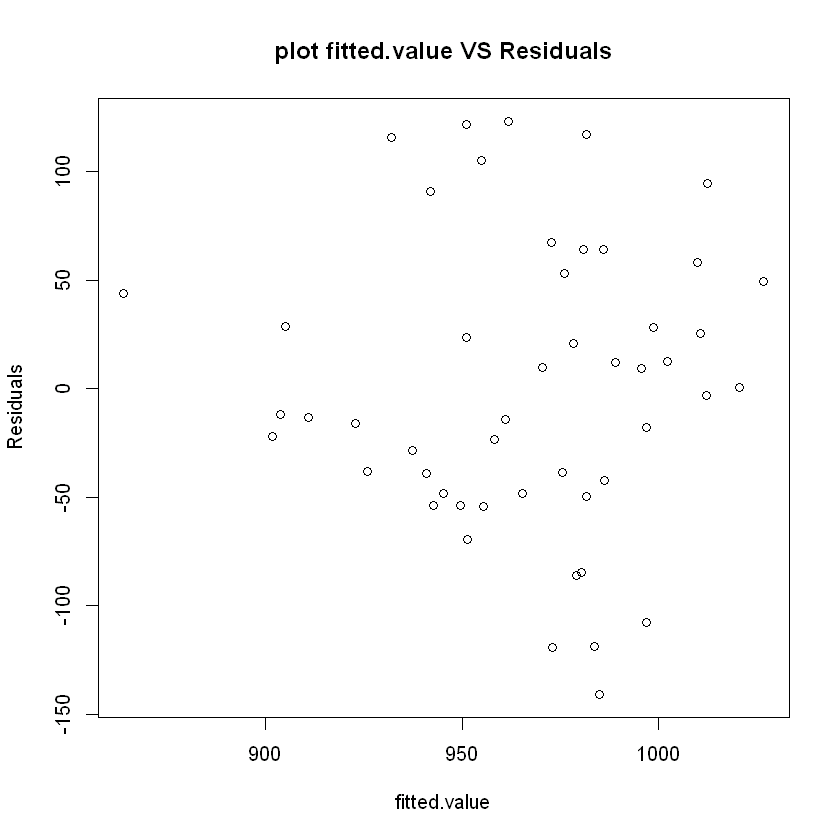

In [15]:
plot( sat.lm$fitted.values,  sat.lm$residuals, xlab="fitted.value", ylab="Residuals", main="plot fitted.value VS Residuals"  )

- 잔차가 고루 분표되어 있는것을 보여지며, Cook와 Weisberg의 Non-constant Variance Score Test을 실시하여 확인함

In [16]:
library( car )


Attaching package: 'car'

The following objects are masked from 'package:faraway':

    logit, vif



In [17]:
ncvTest( sat.lm )

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.313934    Df = 1     p = 0.5752761 

- 등분산하지 않다라는 증거가 없으므로, 등분산성이 있다라고 판단함.

#### (b) Check the normality assumption.

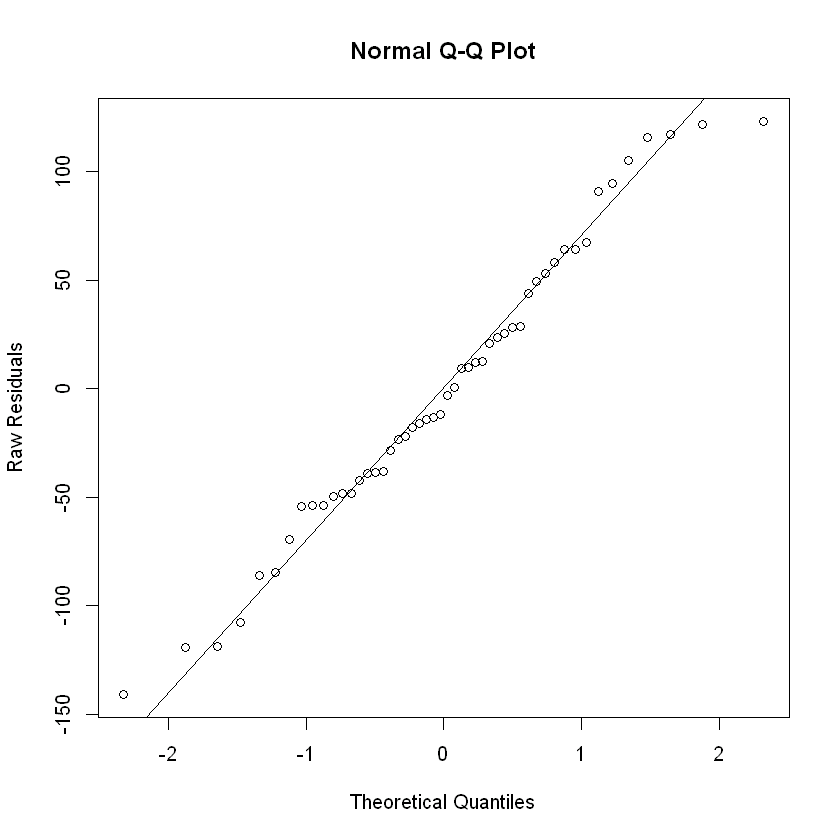

In [19]:
qqnorm( sat.lm$res, ylab="Raw Residuals" )
qqline( sat.lm$res )

- 점들 직선과 많이 떨어지지 않아서 정규성이 있어보이며, shapiro-Wilk Normality test을 실시해봄.

In [21]:
install.packages( 'mvnormtest', repos="http://cran.nexr.com/" )

package 'mvnormtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\RtmpyY4z0u\downloaded_packages


In [22]:
library( mvnormtest )

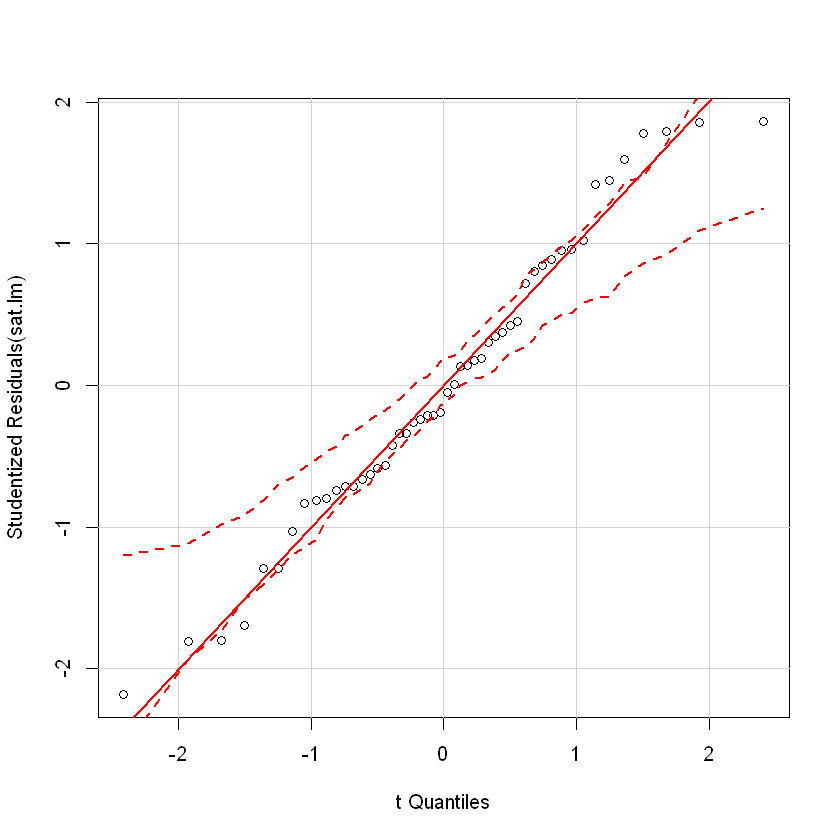

In [23]:
qqPlot( sat.lm )

In [24]:
sat.rst <- rstudent( sat.lm )
shapiro.test( sat.rst )


	Shapiro-Wilk normality test

data:  sat.rst
W = 0.9771, p-value = 0.4367


- 정규성 가정을 기각하지 못하므로 정규성 있음.

#### (c) Check for large leverage points.

In [25]:
sat.inf <- influence( sat.lm )
names( sat.inf )

[1] "hat"          "coefficients" "sigma"        "wt.res"

In [28]:
round( sat.inf$hat, 3)
max( round( sat.inf$hat, 3) )

Alabama         Alaska        Arizona       Arkansas     California 
         0.077          0.160          0.048          0.045          0.279 
      Colorado    Connecticut       Delaware        Florida        Georgia 
         0.030          0.224          0.036          0.102          0.036 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
         0.044          0.058          0.069          0.035          0.031 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
         0.053          0.026          0.087          0.079          0.044 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
         0.065          0.107          0.022          0.059          0.036 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
         0.120          0.059          0.045          0.036          0.222 
    New Mexico       New York North Carolina   North Dakota           Ohio 
         0.044          0.191          0.034          0.076          0.026 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
         0.053          0.087          0.121          0.059          0.042 
  South Dakota      Tennessee          Texas           Utah        Vermont 
         0.090          0.080          0.038          0.291          0.058 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
         0.127          0.089          0.052          0.034          0.071

[1] 0.291

- Utah로 Hat-value 가 0.291 값이 나옴.

In [31]:
jack <- rstudent( sat.lm )
jack[ which.max( abs(jack) ) ]

South Carolina 
     -2.181293

In [44]:
length( sat$total  )

[1] 50

In [50]:
2 * 50 * ( 1 - pt(2.18, 45 ) )

[1] 1.726433

In [49]:
outlierTest( sat.lm )


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
                rstudent unadjusted p-value Bonferonni p
South Carolina -2.181293           0.034427           NA

## 13주

### 1. Use the prostate data with lpsa as the response and the other variables as predictors. Implement the following variable selection methods to determine the "best" model:

In [5]:
library(faraway)
data(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

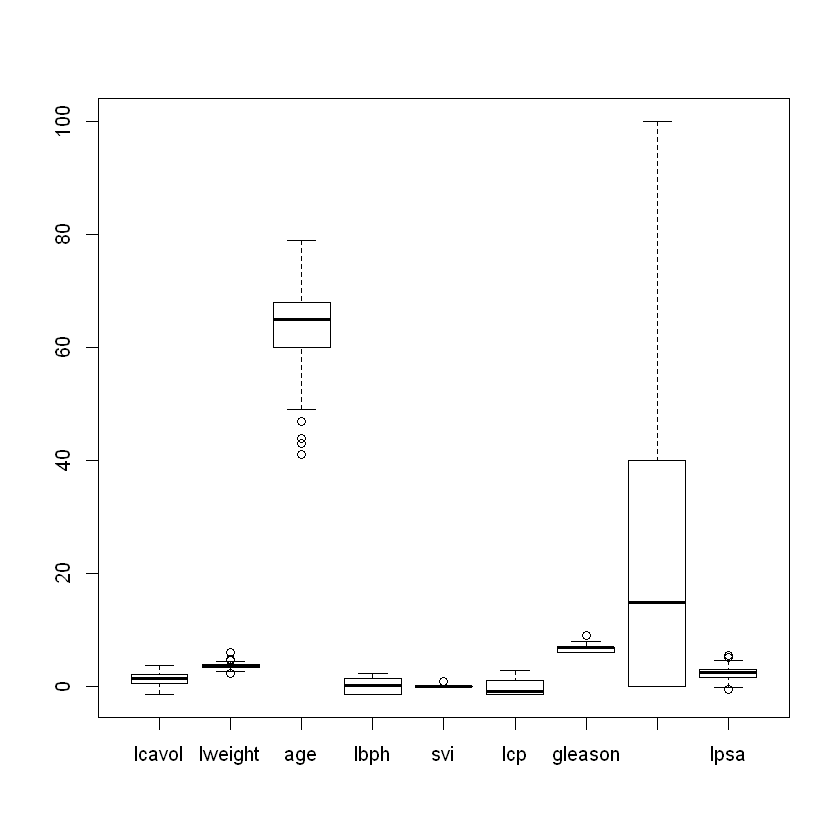

In [7]:
summary( prostate )
boxplot( prostate )

In [8]:
head( prostate )

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
2,-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
3,-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
4,-1.203973,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
5,0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
6,-1.049822,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


- boxplot을 그려서 변수들을 확인한 결과 svi변수는 0, 1로 된 카테고리형 변수이고,  pgg45변수는 최대값이 100, 최소값이 0인 연속형변수로 보여지지만, 어떤 변수인지 모형을 만들기전에 확인할 필요가 있음. 

#### (a) Backward Elimination

In [15]:
prostate.lm <- lm( lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45   , data=prostate  )
summary( prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi + lcp + 
    gleason + pgg45, data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


- p값이 가장 큰 gleason 변수를 제거

In [16]:
prostate.lm <- update( prostate.lm, . ~ .  -  gleason)
summary(  prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi + lcp + 
    pgg45, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73117 -0.38137 -0.01728  0.43364  1.63513 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.953926   0.829439   1.150  0.25319    
lcavol       0.591615   0.086001   6.879 8.07e-10 ***
lweight      0.448292   0.167771   2.672  0.00897 ** 
age         -0.019336   0.011066  -1.747  0.08402 .  
lbph         0.107671   0.058108   1.853  0.06720 .  
svi          0.757734   0.241282   3.140  0.00229 ** 
lcp         -0.104482   0.090478  -1.155  0.25127    
pgg45        0.005318   0.003433   1.549  0.12488    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7048 on 89 degrees of freedom
Multiple R-squared:  0.6544,	Adjusted R-squared:  0.6273 
F-statistic: 24.08 on 7 and 89 DF,  p-value: < 2.2e-16


- p값이 가장 큰 lcp 변수를 제거

In [17]:
prostate.lm <- update( prostate.lm, . ~ .  -  lcp)
summary(  prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi + pgg45, 
    data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77711 -0.41708  0.00002  0.40676  1.59681 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.980085   0.830665   1.180  0.24116    
lcavol       0.545770   0.076431   7.141 2.31e-10 ***
lweight      0.449450   0.168078   2.674  0.00890 ** 
age         -0.017470   0.010967  -1.593  0.11469    
lbph         0.105755   0.058191   1.817  0.07249 .  
svi          0.641666   0.219757   2.920  0.00442 ** 
pgg45        0.003528   0.003068   1.150  0.25331    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7061 on 90 degrees of freedom
Multiple R-squared:  0.6493,	Adjusted R-squared:  0.6259 
F-statistic: 27.77 on 6 and 90 DF,  p-value: < 2.2e-16


- p값이 가장 큰 pgg45 변수를 제거

In [18]:
prostate.lm <- update( prostate.lm, . ~ .  -  pgg45)
summary(  prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83505 -0.39396  0.00414  0.46336  1.57888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95100    0.83175   1.143 0.255882    
lcavol       0.56561    0.07459   7.583 2.77e-11 ***
lweight      0.42369    0.16687   2.539 0.012814 *  
age         -0.01489    0.01075  -1.385 0.169528    
lbph         0.11184    0.05805   1.927 0.057160 .  
svi          0.72095    0.20902   3.449 0.000854 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7073 on 91 degrees of freedom
Multiple R-squared:  0.6441,	Adjusted R-squared:  0.6245 
F-statistic: 32.94 on 5 and 91 DF,  p-value: < 2.2e-16


- p값이 가장 큰 age 변수를 제거

In [19]:
prostate.lm <- update( prostate.lm, . ~ .  -  age )
summary(  prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + lbph + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82653 -0.42270  0.04362  0.47041  1.48530 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14554    0.59747   0.244  0.80809    
lcavol       0.54960    0.07406   7.422 5.64e-11 ***
lweight      0.39088    0.16600   2.355  0.02067 *  
lbph         0.09009    0.05617   1.604  0.11213    
svi          0.71174    0.20996   3.390  0.00103 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7108 on 92 degrees of freedom
Multiple R-squared:  0.6366,	Adjusted R-squared:  0.6208 
F-statistic: 40.29 on 4 and 92 DF,  p-value: < 2.2e-16


- p값이 가장 큰 lbph 변수를 제거

In [23]:
prostate.lm <- update( prostate.lm, . ~ .  -  lbph )
summary(  prostate.lm  )


Call:
lm(formula = lpsa ~ lcavol + lweight + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72964 -0.45764  0.02812  0.46403  1.57013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.26809    0.54350  -0.493  0.62298    
lcavol       0.55164    0.07467   7.388  6.3e-11 ***
lweight      0.50854    0.15017   3.386  0.00104 ** 
svi          0.66616    0.20978   3.176  0.00203 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7168 on 93 degrees of freedom
Multiple R-squared:  0.6264,	Adjusted R-squared:  0.6144 
F-statistic: 51.99 on 3 and 93 DF,  p-value: < 2.2e-16


[1] 216.5979

- 남아있는 3개의 변수가 모두 유의하므로,  최종모형은  이것으로 선정할 수 있음
- 그러나, 나이와 pgg45 변수를 변환처리후에 하였으면, 최종모형이 다른 결과가 나올수도 있음.

#### (b) AIC

In [24]:
library(MASS)

Start:  AIC=-58.32
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + 
    pgg45

          Df Sum of Sq    RSS     AIC
- gleason  1    0.0412 44.204 -60.231
- pgg45    1    0.5258 44.689 -59.174
- lcp      1    0.6740 44.837 -58.853
<none>                 44.163 -58.322
- age      1    1.5503 45.713 -56.975
- lbph     1    1.6835 45.847 -56.693
- lweight  1    3.5861 47.749 -52.749
- svi      1    4.9355 49.099 -50.046
- lcavol   1   22.3721 66.535 -20.567

Step:  AIC=-60.23
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45

          Df Sum of Sq    RSS     AIC
- lcp      1    0.6623 44.867 -60.789
<none>                 44.204 -60.231
- pgg45    1    1.1920 45.396 -59.650
- age      1    1.5166 45.721 -58.959
- lbph     1    1.7053 45.910 -58.560
- lweight  1    3.5462 47.750 -54.746
- svi      1    4.8984 49.103 -52.037
- lcavol   1   23.5039 67.708 -20.872

Step:  AIC=-60.79
lpsa ~ lcavol + lweight + age + lbph + svi + pgg45

          Df Sum of Sq    RSS     AIC



Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi, data = prostate)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
    0.95100      0.56561      0.42369     -0.01489      0.11184      0.72095  


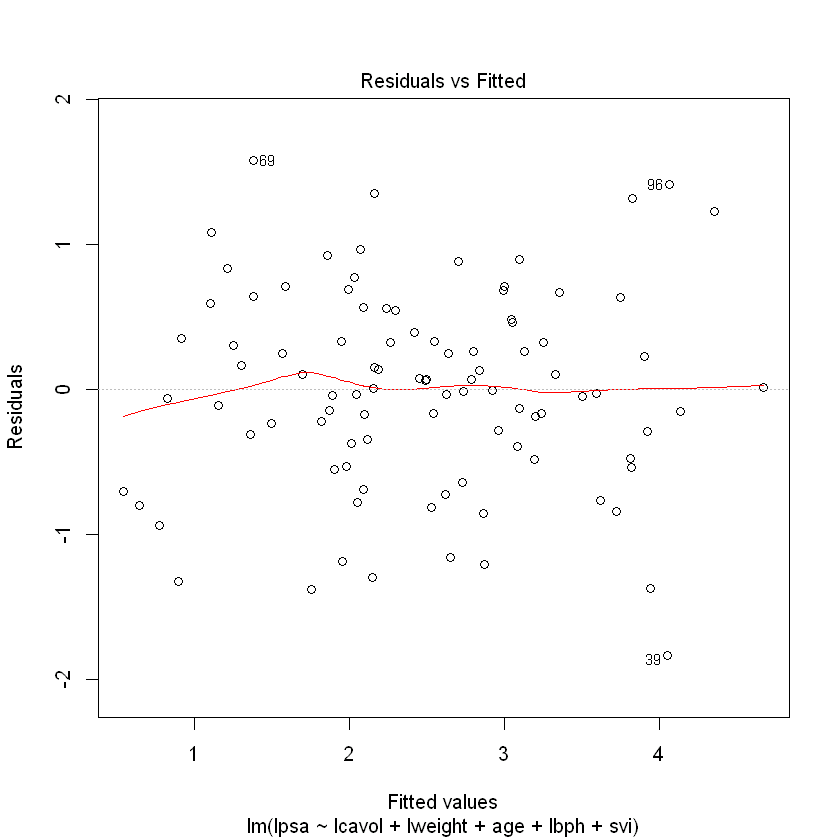

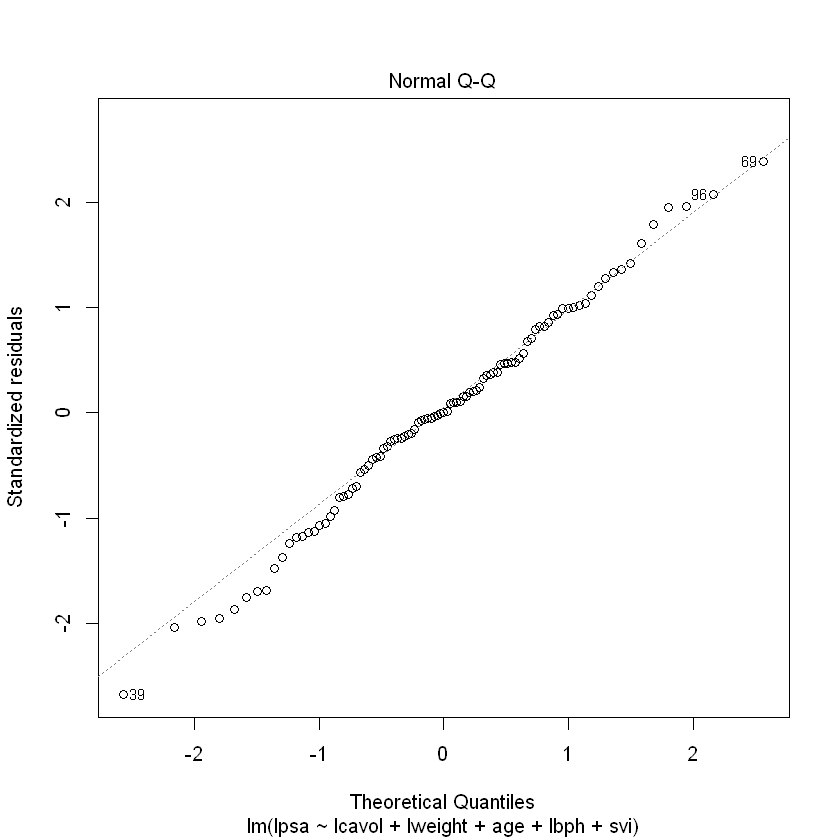

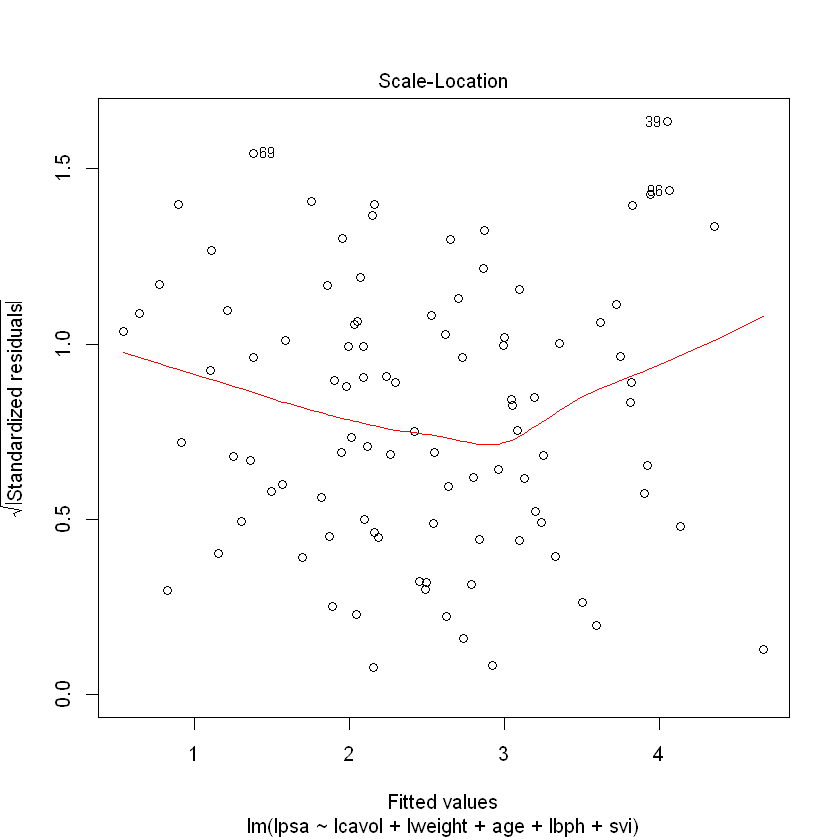

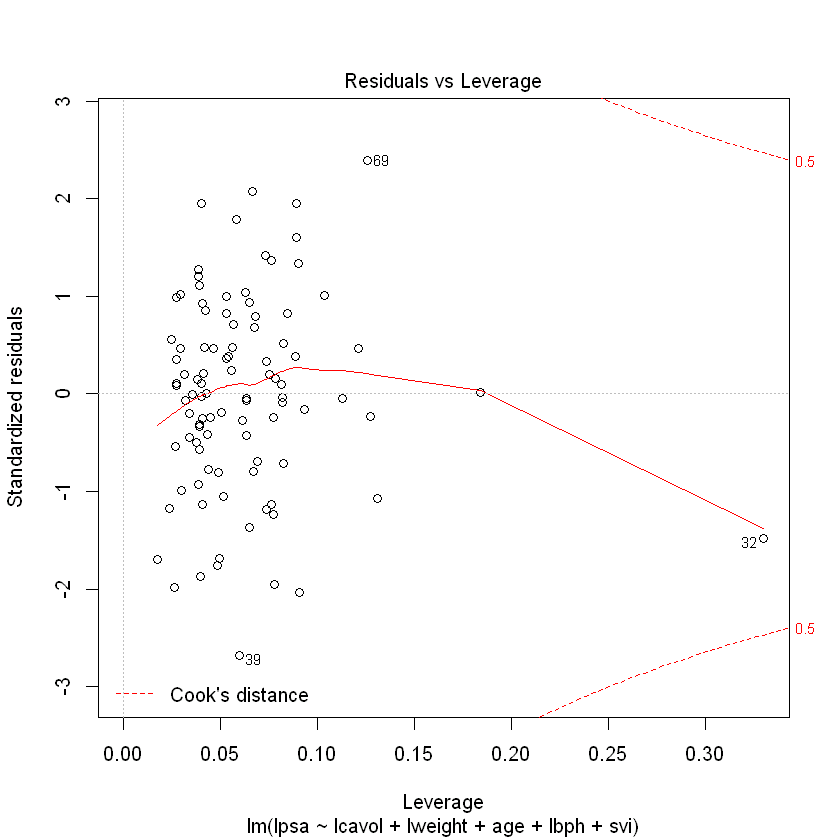

In [26]:
prostate.lm <- lm( lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45   , data=prostate  )
prostate.lm.aic <- stepAIC(prostate.lm, upper=~., lower=~1, direction="back" )
prostate.lm.aic

plot(prostate.lm.aic)

#### (c) Adjusted R2

In [30]:
install.packages("leaps", repos="http://cran.nexr.com/" )

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\RtmpEfFeSK\downloaded_packages


In [34]:
library(leaps)
attach( prostate ) 

In [35]:
predictors <- cbind(  lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45 )

prostate.leaps <- leaps(predictors, lpsa , method="adjr2" )
maxadjr(prostate.leaps)

1,2,3,4,5,6,8   1,2,3,4,5,8     1,2,3,4,5 
        0.627         0.626         0.625

-  3가지 모형이 비슷하게  Adjusted R2값을 갖지만, lcavol, lweight, age, lbph변수를 사용할때가 모형 단순화의 원칙에 따라서, 가장 최적화된 모형이라고 할 수 있음

#### (d) Mallows Cp

1 2 4 5 
1 2 4 5

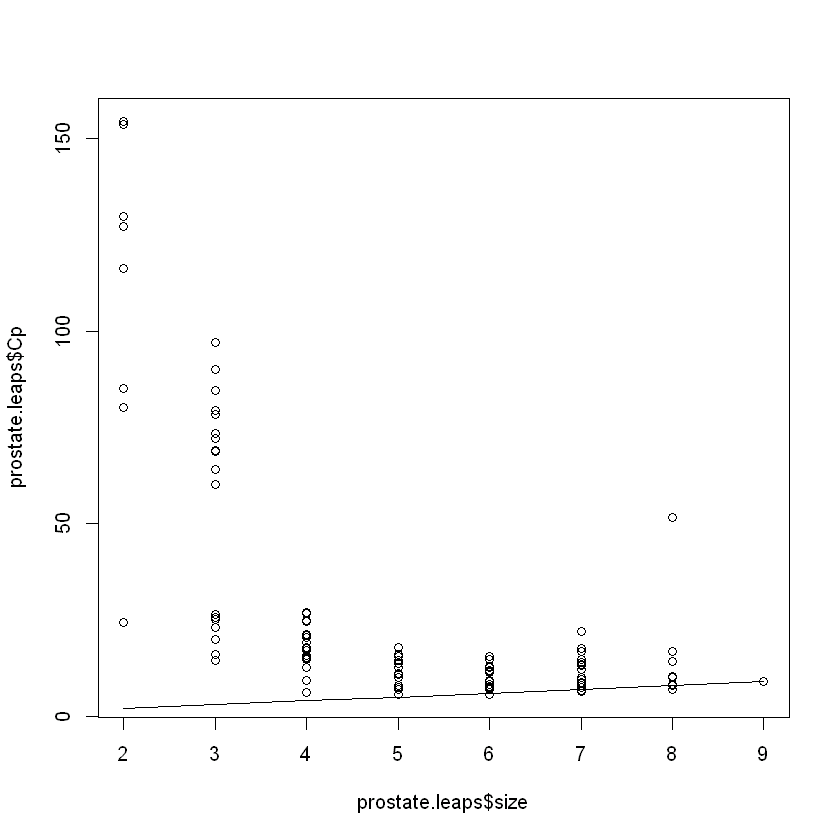

In [39]:
prostate.leaps <- leaps(predictors, lpsa, nbest = 20)
plot( prostate.leaps$size, prostate.leaps$Cp )          # plot Cp vs number of predictors, p
lines( prostate.leaps$size, prostate.leaps$size )       # adds the line for Cp = p
i <- which(prostate.leaps$Cp==min(prostate.leaps$Cp)) # finds the model with smallest Cp
vars <- which(prostate.leaps$which[i,])  # id variables of best model
vars

### 2. Fit a linear model to the stackloss data with stack. loss as the predictor and the other variables as predictors. Simplify the model if possible. Check the model for outliers and influential points. Now return to the full model, determine whether there are any outliers or influential points, eliminate them and then repeat the variable selection procedures.

In [12]:
library(leaps)
data(stackloss)

    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

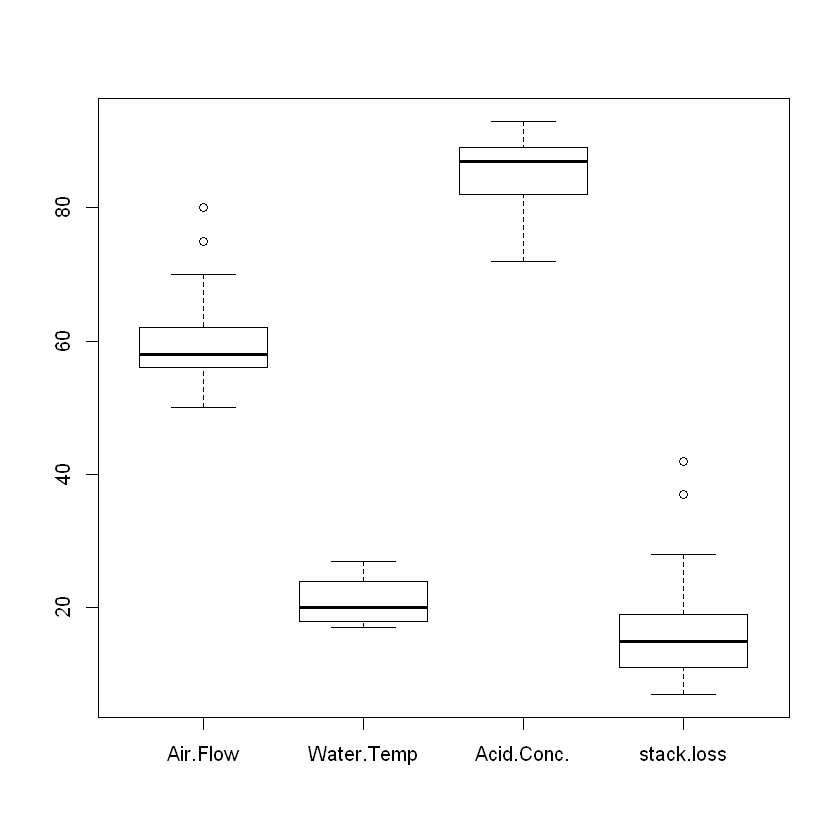

In [13]:
summary( stackloss )
boxplot( stackloss )

In [5]:
stackloss.lm.start <- lm(stack.loss ~ 1., data=stackloss )
stackloss.lm.full <- lm(stack.loss ~ ., data=stackloss )
stackloss.lm.best <- step(stackloss.lm.start, scope=list(upper=stackloss.lm.full), data=stackloss, direction="both")
summary( stackloss.lm.best )

Start:  AIC=98.4
stack.loss ~ 1

             Df Sum of Sq     RSS    AIC
+ Air.Flow    1    1750.1  319.12 61.142
+ Water.Temp  1    1586.1  483.15 69.852
+ Acid.Conc.  1     330.8 1738.44 96.741
<none>                    2069.24 98.399

Step:  AIC=61.14
stack.loss ~ Air.Flow

             Df Sum of Sq     RSS    AIC
+ Water.Temp  1    130.32  188.80 52.119
<none>                     319.12 61.142
+ Acid.Conc.  1      9.98  309.14 62.475
- Air.Flow    1   1750.12 2069.24 98.399

Step:  AIC=52.12
stack.loss ~ Air.Flow + Water.Temp

             Df Sum of Sq    RSS    AIC
<none>                    188.80 52.119
+ Acid.Conc.  1     9.965 178.83 52.980
- Water.Temp  1   130.321 319.12 61.142
- Air.Flow    1   294.355 483.15 69.852



Call:
lm(formula = stack.loss ~ Air.Flow + Water.Temp, data = stackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5290 -1.7505  0.1894  2.1156  5.6588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.3588     5.1383  -9.801 1.22e-08 ***
Air.Flow      0.6712     0.1267   5.298 4.90e-05 ***
Water.Temp    1.2954     0.3675   3.525  0.00242 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.239 on 18 degrees of freedom
Multiple R-squared:  0.9088,	Adjusted R-squared:  0.8986 
F-statistic: 89.64 on 2 and 18 DF,  p-value: 4.382e-10


- stack.loss ~ Air.Flow + Water.Temp 모델이 가장 베스트 모델임.

In [10]:
stackloss.lm.inf <- influence( stackloss.lm.best )
round( stackloss.lm.inf$hat, 3 )
stackloss.lm.inf$hat[which.max(stackloss.lm.inf$hat)]

1     2     3     4     5     6     7     8     9    10    11    12    13 
0.281 0.281 0.174 0.128 0.052 0.077 0.128 0.128 0.135 0.128 0.128 0.204 0.128 
   14    15    16    17    18    19    20    21 
0.078 0.113 0.113 0.119 0.119 0.150 0.059 0.276

2 
0.2805649

- 가장 영향력이 있는 데이터는 2번 데이터로 나옴.

In [7]:
library(car)

In [9]:
cook <- cooks.distance(stackloss.lm.best)
round( cook, 3 )
cook[which.max(cook)]

1     2     3     4     5     6     7     8     9    10    11    12    13 
0.235 0.029 0.174 0.172 0.006 0.027 0.060 0.029 0.065 0.024 0.024 0.059 0.004 
   14    15    16    17    18    19    20    21 
0.004 0.010 0.001 0.000 0.000 0.000 0.007 0.949

21 
0.94868

- Cook's distance로 이상치 검색시 21번 데이터가 가장 이상치라고 나옴.

- 2번과 21번 데이터를 제거후에 모형을 적합시킴.

In [15]:
stackloss.elim <- stackloss[-c( 2,21 )]
summary( stackloss.elim )

stackloss.elim.lm.start <- lm(stack.loss ~ 1., data=stackloss.elim )
stackloss.elim.lm.full <- lm(stack.loss ~ ., data=stackloss.elim )
stackloss.elim.lm.best <- step(stackloss.elim.lm.start, scope=list(upper=stackloss.elim.lm.full), data=stackloss.elim, direction="both")
summary( stackloss.elim.lm.best )

    Air.Flow       Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :93.00   Max.   :42.00  

Start:  AIC=98.4
stack.loss ~ 1

             Df Sum of Sq     RSS    AIC
+ Air.Flow    1    1750.1  319.12 61.142
+ Acid.Conc.  1     330.8 1738.44 96.741
<none>                    2069.24 98.399

Step:  AIC=61.14
stack.loss ~ Air.Flow

             Df Sum of Sq     RSS    AIC
<none>                     319.12 61.142
+ Acid.Conc.  1      9.98  309.14 62.475
- Air.Flow    1   1750.12 2069.24 98.399



Call:
lm(formula = stack.loss ~ Air.Flow, data = stackloss.elim)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
Air.Flow      1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


- 이전에서는 •stack.loss ~ Air.Flow + Water.Temp 모델이 베스트였지만, 이상치가 제거된 후에는 stack.loss ~ Air.Flow 모델이 베스트임

## 14주

### 1. Using the Canadian occupational prestige data (the Prestige data frame in the car package – see ?Prestige),

In [38]:
library(car)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
     census       type   
 Min.   :1113   bc  :44  
 1st Qu.:3120   prof:31  
 Median :5135   wc  :23  
 Mean   :5402   NA's: 4  
 3rd Qu.:8312            
 Max.   :9517            

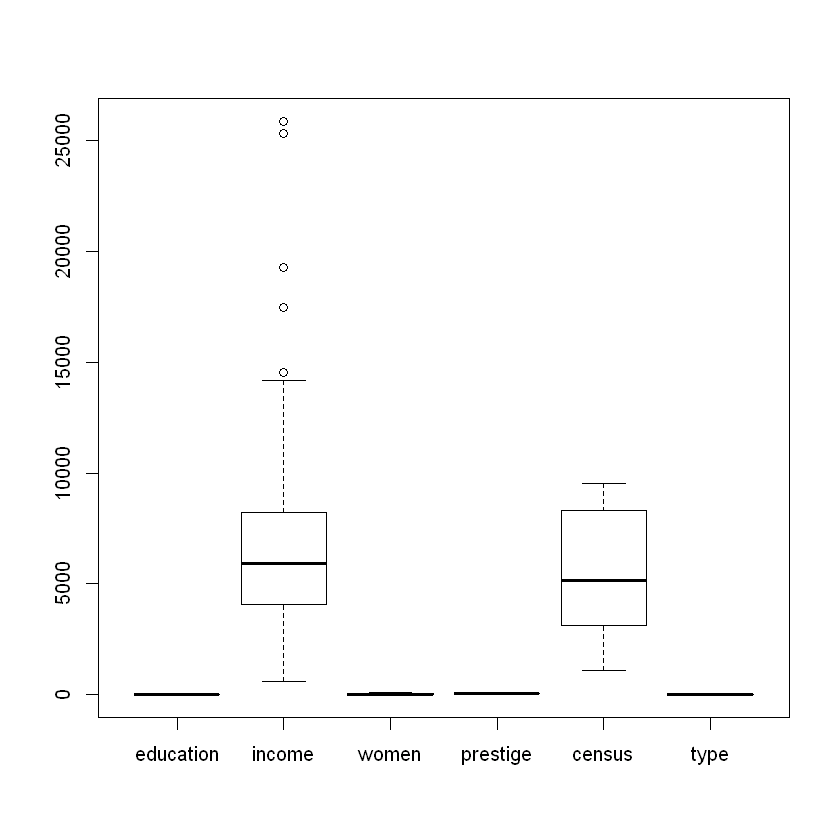

In [39]:
data( Prestige )
summary( Prestige )
boxplot( Prestige )

#### (1) Fit a linear regression of prestige on education, income, type and women (i.e., percent women in the occupation) and explain the model.

In [40]:
prestige.lm <- lm( prestige ~ education + income + type + women , data=Prestige )
summary( prestige.lm )


Call:
lm(formula = prestige ~ education + income + type + women, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7485  -4.4817   0.3119   5.2478  18.4978 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.8139032  5.3311558  -0.153 0.878994    
education    3.6623557  0.6458300   5.671 1.63e-07 ***
income       0.0010428  0.0002623   3.976 0.000139 ***
typeprof     5.9051970  3.9377001   1.500 0.137127    
typewc      -2.9170720  2.6653961  -1.094 0.276626    
women        0.0064434  0.0303781   0.212 0.832494    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.132 on 92 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.826 
F-statistic: 93.07 on 5 and 92 DF,  p-value: < 2.2e-16


- education, income 변수가 유의하고, 나머지 변수가 유의하지 않게 나옴.
- prestige  =   -0.8139032   +  3.6623557   x   education + 0.0010428  x income   라는 모형을 만들 수 있음.

#### (2) Use “regression diagnostics” to check for problems in this regression and attempt to correct any problems that you discover.

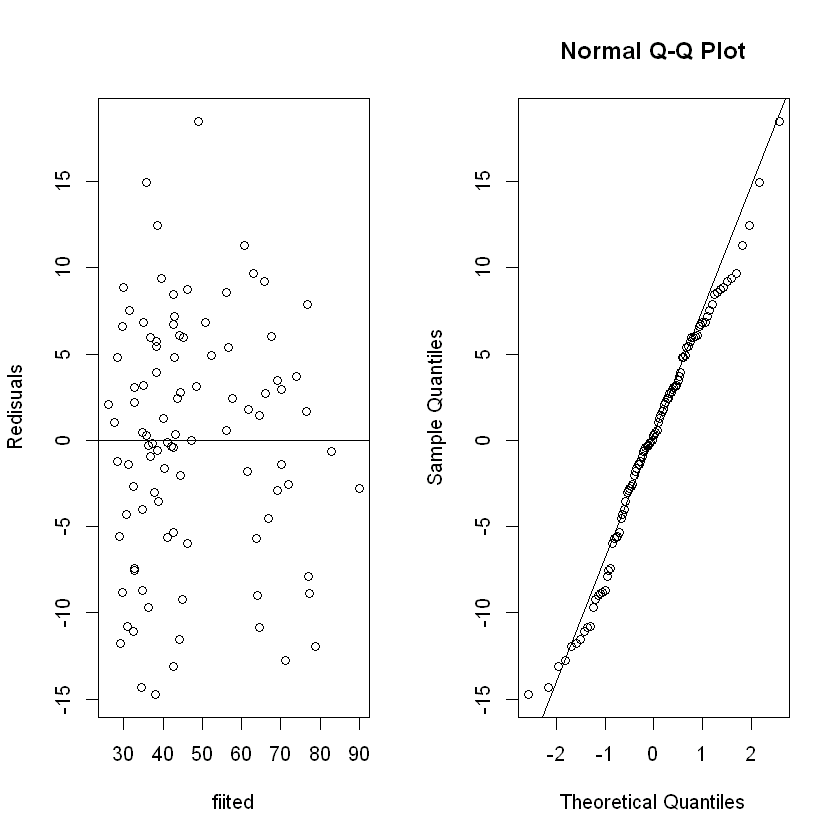

In [5]:
par(mfrow=c(1, 2) )
plot( fitted(prestige.lm), residuals(prestige.lm), xlab="fiited", ylab="Redisuals" )
abline( h = 0 )

qqnorm( residuals(prestige.lm) )
qqline( residuals(prestige.lm) )

par(mfrow=c(1, 1))

- 잔차의 등분상성과 정규성에는 문제 없음.

In [6]:
library( faraway )


Attaching package: 'faraway'

The following objects are masked from 'package:car':

    logit, vif



[1] -2.198127  2.797377

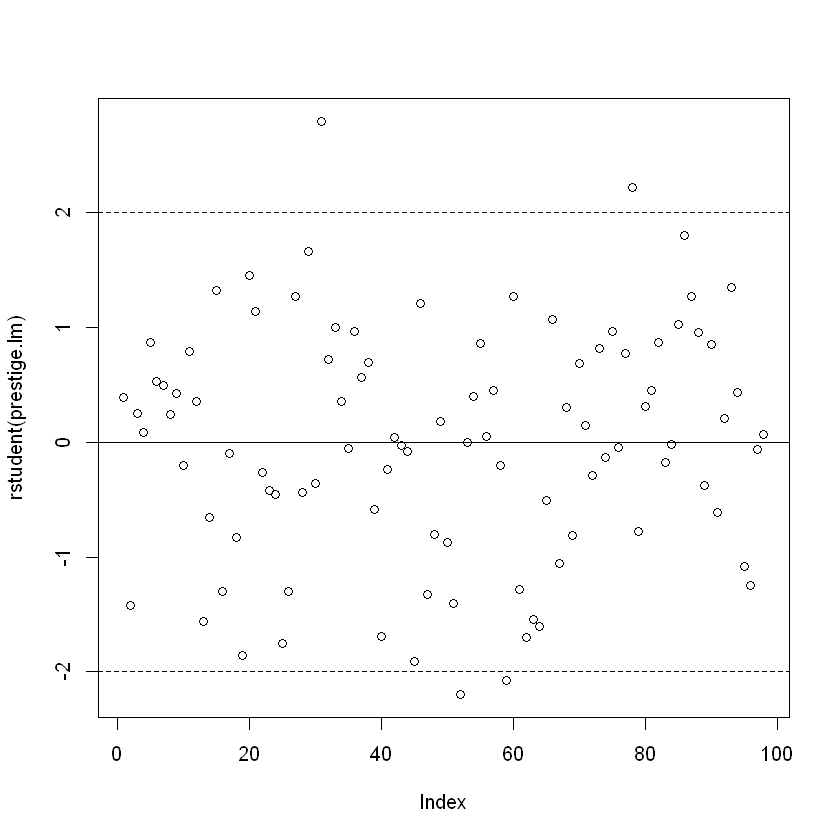

In [7]:
plot( rstudent(prestige.lm)  )
abline( h=0 )
abline( h=2, lty=2);abline( h=-2, lty=2)
range( rstudent(prestige.lm) )

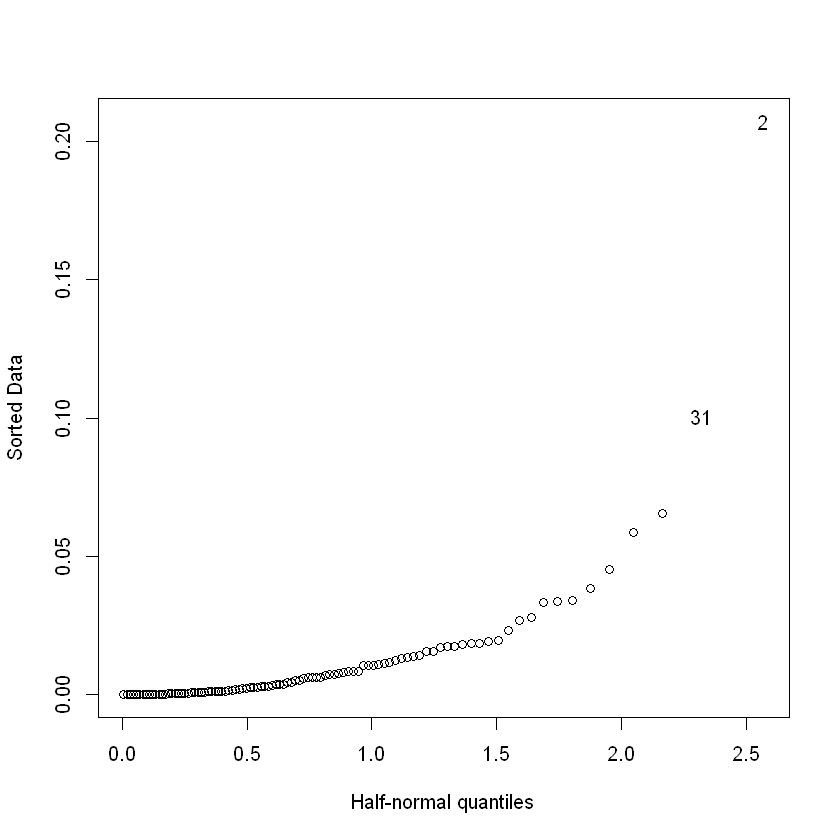

In [8]:
halfnorm( cooks.distance(prestige.lm) )

- Cook's  Distance을 구해서 2, 31번 데이터가 이상치 데이터로 나옴.

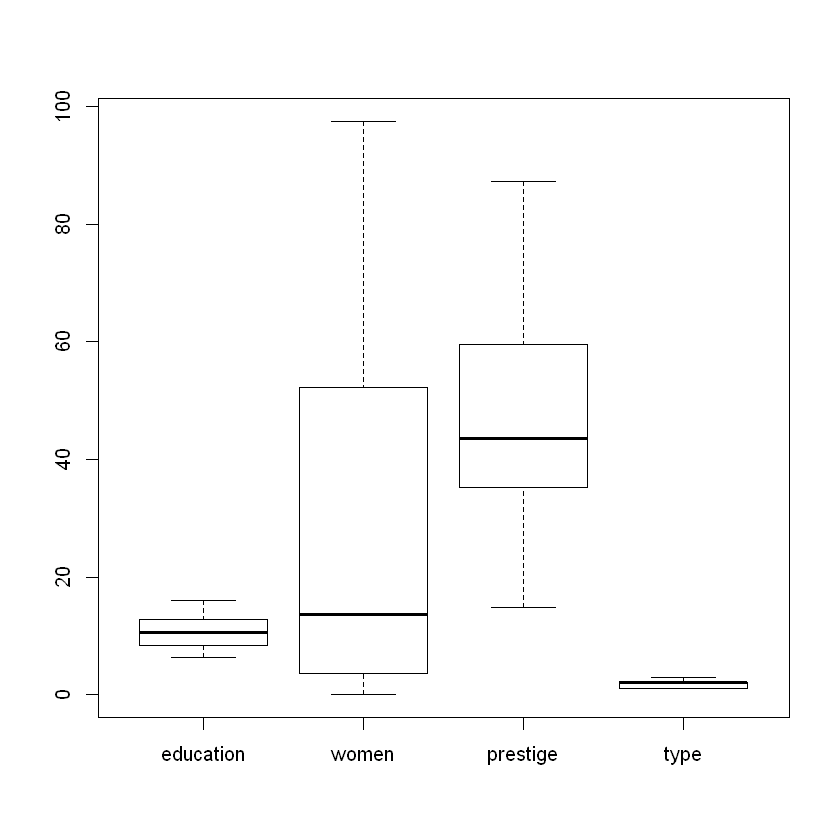

In [10]:
boxplot( Prestige[ , -c(2,5)] )

- women 변수가 정규분포를 따르지 않고 한쪽으로 치우져 있음

Warning message:
In bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == : Outlier (-Inf) in boxplot 1 is not drawn

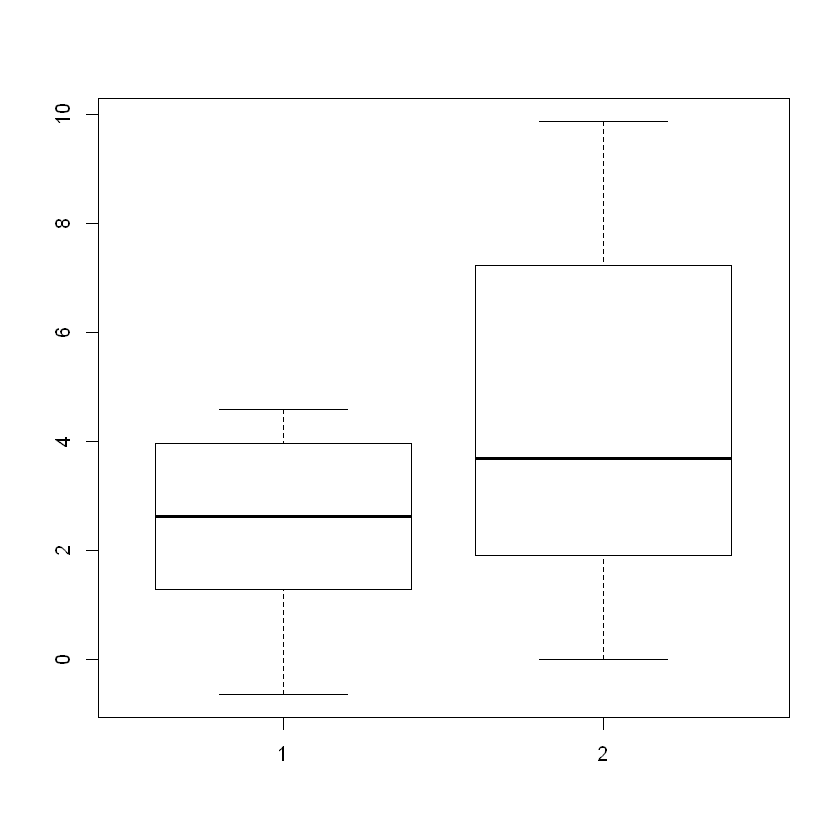

In [11]:
boxplot( log(Prestige$women), sqrt( Prestige$women ) )

- women 변수는 log()변환시 정규분포와 비슷해짐.

- women 변수을 log()변환하고 2, 31번 데이터를 제거후에 모형을 적합 
- women + 1 을 하고 log()함수를 한 이유는 log(women)으로 변환시 NA 값이 나오는 경우가 발생하므로 1일 더해주고 log()변환함.

In [35]:
prestige.lm.correct <- lm( prestige ~ education + income + type + log(women+1) , data=Prestige, subset=-c(2, 31) )
summary(prestige.lm.correct)


Call:
lm(formula = prestige ~ education + income + type + log(women + 
    1), data = Prestige, subset = -c(2, 31))

Residuals:
    Min      1Q  Median      3Q     Max 
-13.928  -4.341   0.545   4.774  16.855 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.7475299  5.4298342   0.874 0.384259    
education       3.0829968  0.6724766   4.585 1.46e-05 ***
income          0.0011274  0.0002968   3.798 0.000264 ***
typeprof        9.5219333  3.9211316   2.428 0.017156 *  
typewc         -1.1698762  2.6240962  -0.446 0.656797    
log(women + 1) -0.5210891  0.6425802  -0.811 0.419544    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.806 on 90 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8481,	Adjusted R-squared:  0.8397 
F-statistic: 100.5 on 5 and 90 DF,  p-value: < 2.2e-16


In [41]:
library( leaps ) 
Prestige.clean <- Prestige[-c(2, 31), ]
Prestige.clean.reg <- regsubsets( prestige ~ education + income + type + log(women+1) , data=Prestige.clean ) 
( Prestige.clean.reg.sum <- summary(Prestige.clean.reg )  )
Prestige.clean.reg.sum$adj

Subset selection object
Call: regsubsets.formula(prestige ~ education + income + type + log(women + 
    1), data = Prestige.clean)
5 Variables  (and intercept)
               Forced in Forced out
education          FALSE      FALSE
income             FALSE      FALSE
typeprof           FALSE      FALSE
typewc             FALSE      FALSE
log(women + 1)     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         education income typeprof typewc log(women + 1)
1  ( 1 ) "*"       " "    " "      " "    " "           
2  ( 1 ) "*"       "*"    " "      " "    " "           
3  ( 1 ) "*"       "*"    "*"      " "    " "           
4  ( 1 ) "*"       "*"    "*"      " "    "*"           
5  ( 1 ) "*"       "*"    "*"      "*"    "*"           

[1] 0.7505352 0.8148743 0.8411163 0.8411015 0.8396900

- 3번째 모형의 Adj R2값이 가장 크므로 베스트 모형임.
- prestige ~ education + income + type 모형이 베스트임.